In [25]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f_oneway
%matplotlib inline
plt.rcParams["figure.figsize"] = [30, 15]
plt.rcParams.update({'font.size': 22})

In [2]:
row_df = pd.read_csv("MothersOFNewBorn.csv", encoding = 'utf-8',index_col = 0, header = 0)

In [3]:
row_df

,Infant birth weight (gm),Infant birth weight group,Age of mother (years),Last period weight (lb),Race of mother,Smoked during pregnancy,History of premature labor,History of hypertension,Uterine irritability,Physician visits-1st trimester
ID,,,,,,,,,,
85,2523,normal,19,182,black,no,no,no,yes,0
86,2551,normal,33,155,other,no,no,no,no,3
87,2557,normal,20,105,white,yes,no,no,no,1
88,2594,normal,21,108,white,yes,no,no,yes,2
89,2600,normal,18,107,white,yes,no,no,yes,0
...,...,...,...,...,...,...,...,...,...,...
79,2466,low,28,95,white,yes,no,no,no,2
81,2495,low,14,100,other,no,no,no,no,2
82,2495,low,23,94,other,yes,no,no,no,0


In [4]:
row_df.drop(columns = ['Physician visits-1st trimester'], inplace = True)

In [5]:
row_df.loc[row_df['Infant birth weight (gm)'] < 2500, 'bwt'] = 1

In [6]:
row_df.loc[row_df['Infant birth weight (gm)'] >= 2500, 'bwt'] = 0

In [7]:
row_df

,Infant birth weight (gm),Infant birth weight group,Age of mother (years),Last period weight (lb),Race of mother,Smoked during pregnancy,History of premature labor,History of hypertension,Uterine irritability,bwt
ID,,,,,,,,,,
85,2523,normal,19,182,black,no,no,no,yes,0.0
86,2551,normal,33,155,other,no,no,no,no,0.0
87,2557,normal,20,105,white,yes,no,no,no,0.0
88,2594,normal,21,108,white,yes,no,no,yes,0.0
89,2600,normal,18,107,white,yes,no,no,yes,0.0
...,...,...,...,...,...,...,...,...,...,...
79,2466,low,28,95,white,yes,no,no,no,1.0
81,2495,low,14,100,other,no,no,no,no,1.0
82,2495,low,23,94,other,yes,no,no,no,1.0


In [8]:
row_df.loc[row_df['Race of mother'] == 'white', 'race'] = 1
row_df.loc[row_df['Race of mother'] == 'black', 'race'] = 2
row_df.loc[row_df['Race of mother'] == 'other', 'race'] = 3
row_df.loc[row_df['Smoked during pregnancy'] == 'yes', 'smoke'] = 1
row_df.loc[row_df['Smoked during pregnancy'] == 'no', 'smoke'] = -1
row_df.loc[row_df['History of premature labor'] == 'yes', 'ptl'] = 1
row_df.loc[row_df['History of premature labor'] == 'no', 'ptl'] = -1
row_df.loc[row_df['History of hypertension'] == 'yes', 'ht'] = 1
row_df.loc[row_df['History of hypertension'] == 'no', 'ht'] = -1
row_df.loc[row_df['Uterine irritability'] == 'yes', 'ui'] = 1
row_df.loc[row_df['Uterine irritability'] == 'no', 'ui'] = -1

In [9]:
row_df

,Infant birth weight (gm),Infant birth weight group,Age of mother (years),Last period weight (lb),Race of mother,Smoked during pregnancy,History of premature labor,History of hypertension,Uterine irritability,bwt,race,smoke,ptl,ht,ui
ID,,,,,,,,,,,,,,,
85,2523,normal,19,182,black,no,no,no,yes,0.0,2.0,-1.0,-1.0,-1.0,1.0
86,2551,normal,33,155,other,no,no,no,no,0.0,3.0,-1.0,-1.0,-1.0,-1.0
87,2557,normal,20,105,white,yes,no,no,no,0.0,1.0,1.0,-1.0,-1.0,-1.0
88,2594,normal,21,108,white,yes,no,no,yes,0.0,1.0,1.0,-1.0,-1.0,1.0
89,2600,normal,18,107,white,yes,no,no,yes,0.0,1.0,1.0,-1.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2466,low,28,95,white,yes,no,no,no,1.0,1.0,1.0,-1.0,-1.0,-1.0
81,2495,low,14,100,other,no,no,no,no,1.0,3.0,-1.0,-1.0,-1.0,-1.0
82,2495,low,23,94,other,yes,no,no,no,1.0,3.0,1.0,-1.0,-1.0,-1.0


In [10]:
row_df['age_log'] = np.log(row_df['Age of  mother (years)'])
row_df['lwt_log'] = np.log(row_df['Last period weight (lb)'])

In [11]:
def des(col):
    print(col)
    print(row_df[col].value_counts())
    print("mean: " + str(row_df[col].mean()))
    print("std: " + str(row_df[col].std()))
    print("skewness: " + str(row_df[col].skew()))
    print("kurtosis: " + str(row_df[col].kurtosis()))
    print("cv: " + str(row_df[col].std()/row_df[col].mean()))
    row_df[col].plot.hist(bins = 100, title = col)
    plt.show()

Age of  mother (years)
20    18
19    16
25    15
22    13
23    13
24    13
21    12
17    12
18    10
28     9
26     8
30     7
16     7
29     7
32     6
31     5
15     3
14     3
27     3
33     3
36     2
35     2
34     1
45     1
Name: Age of  mother (years), dtype: int64
mean: 23.238095238095237
std: 5.298677933404265
skewness: 0.7221834356410609
kurtosis: 0.6162022516194354
cv: 0.22801687828174091


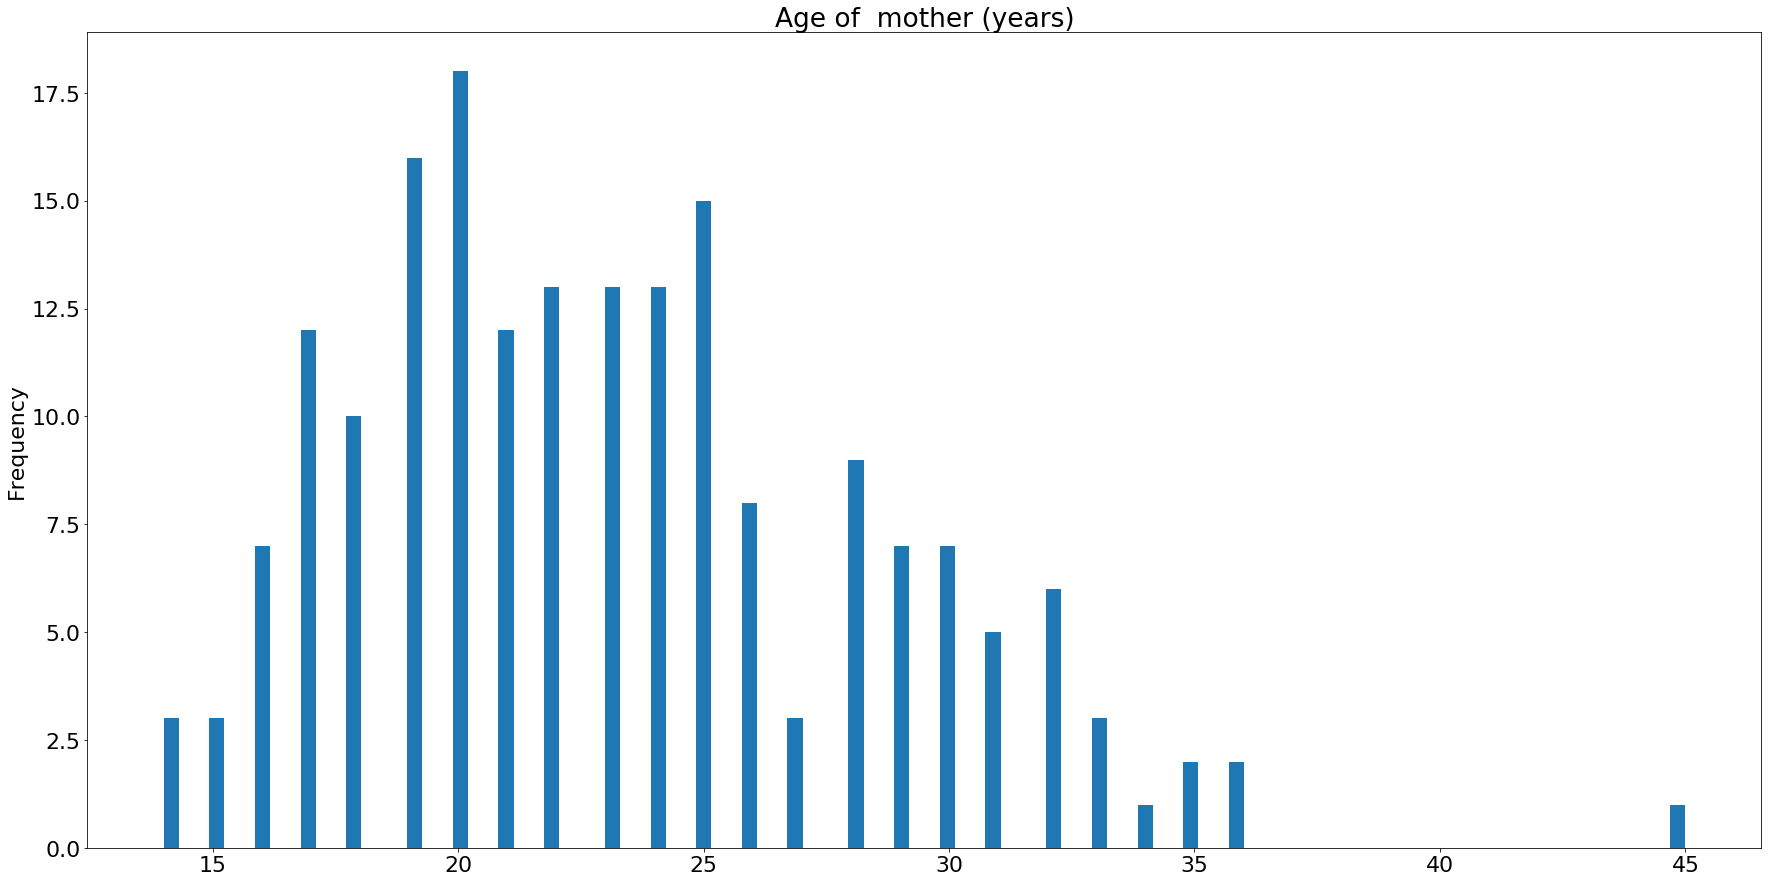

In [12]:
des('Age of  mother (years)')

age_log
2.995732    18
2.944439    16
3.218876    15
3.091042    13
3.178054    13
3.135494    13
3.044522    12
2.833213    12
2.890372    10
3.332205     9
3.258097     8
2.772589     7
3.401197     7
3.367296     7
3.465736     6
3.433987     5
3.295837     3
2.708050     3
3.496508     3
2.639057     3
3.555348     2
3.583519     2
3.806662     1
3.526361     1
Name: age_log, dtype: int64
mean: 3.1208953237051293
std: 0.2226405010707308
skewness: 0.1593761329995101
kurtosis: -0.41013080272267155
cv: 0.0713386634212428


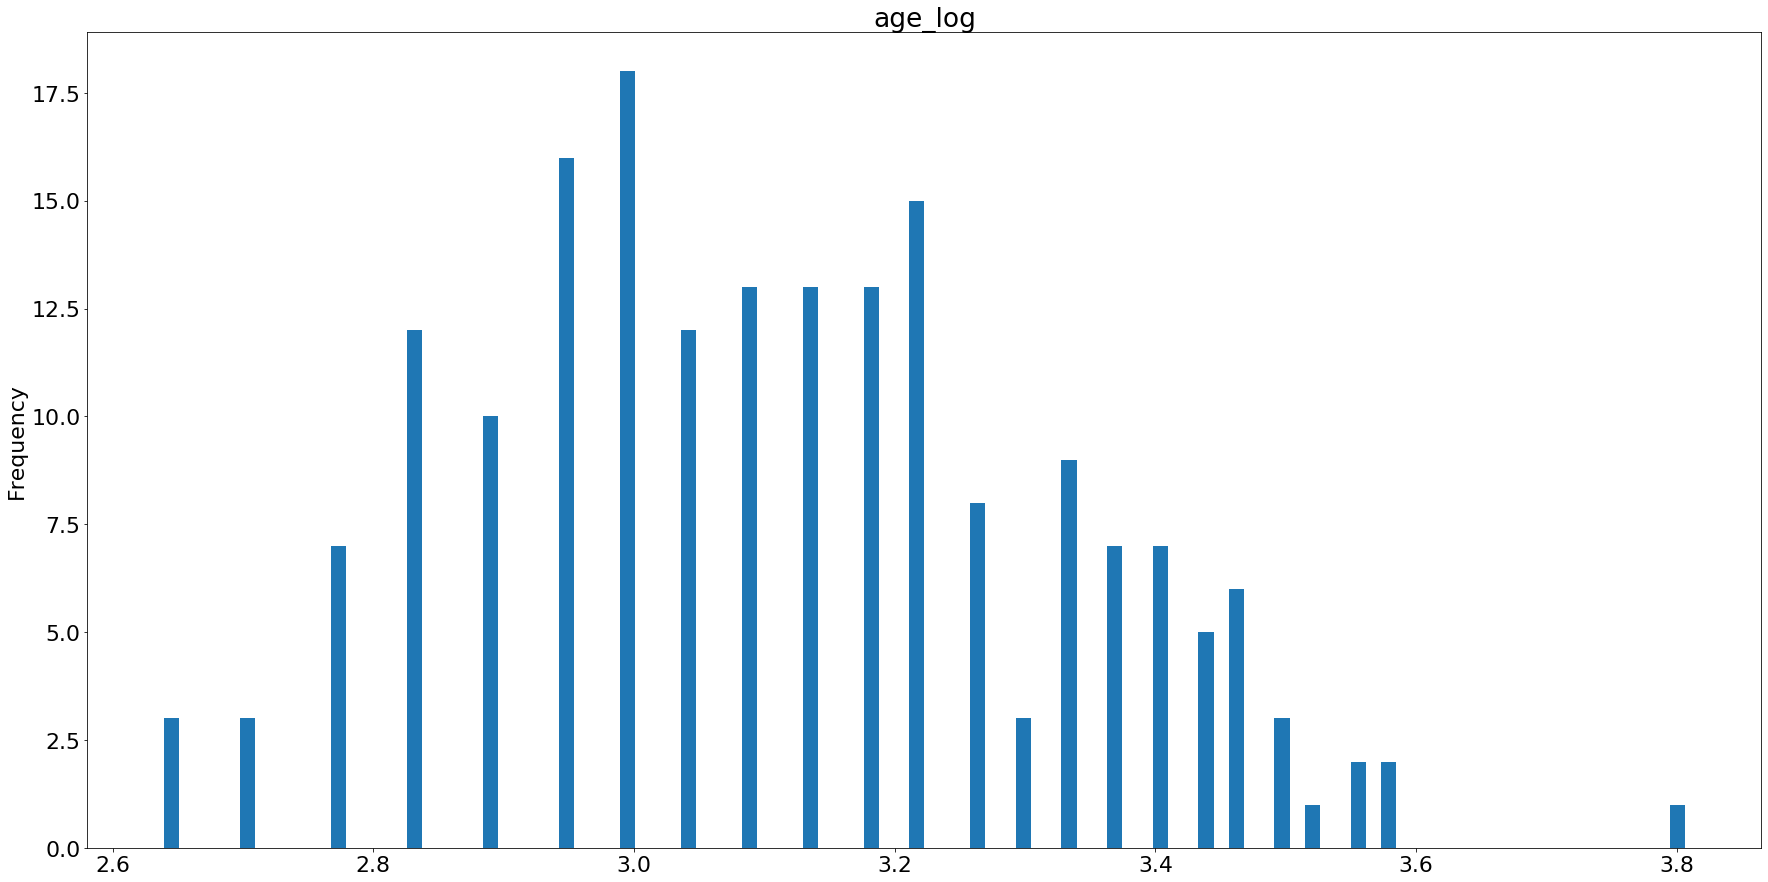

In [13]:
des('age_log')

Last period weight (lb)
120    17
130    13
110    11
115     7
105     7
       ..
141     1
137     1
241     1
129     1
80      1
Name: Last period weight (lb), Length: 75, dtype: int64
mean: 129.8148148148148
std: 30.579380352748768
skewness: 1.4020067975650368
kurtosis: 2.403885403467306
cv: 0.2355615604919306


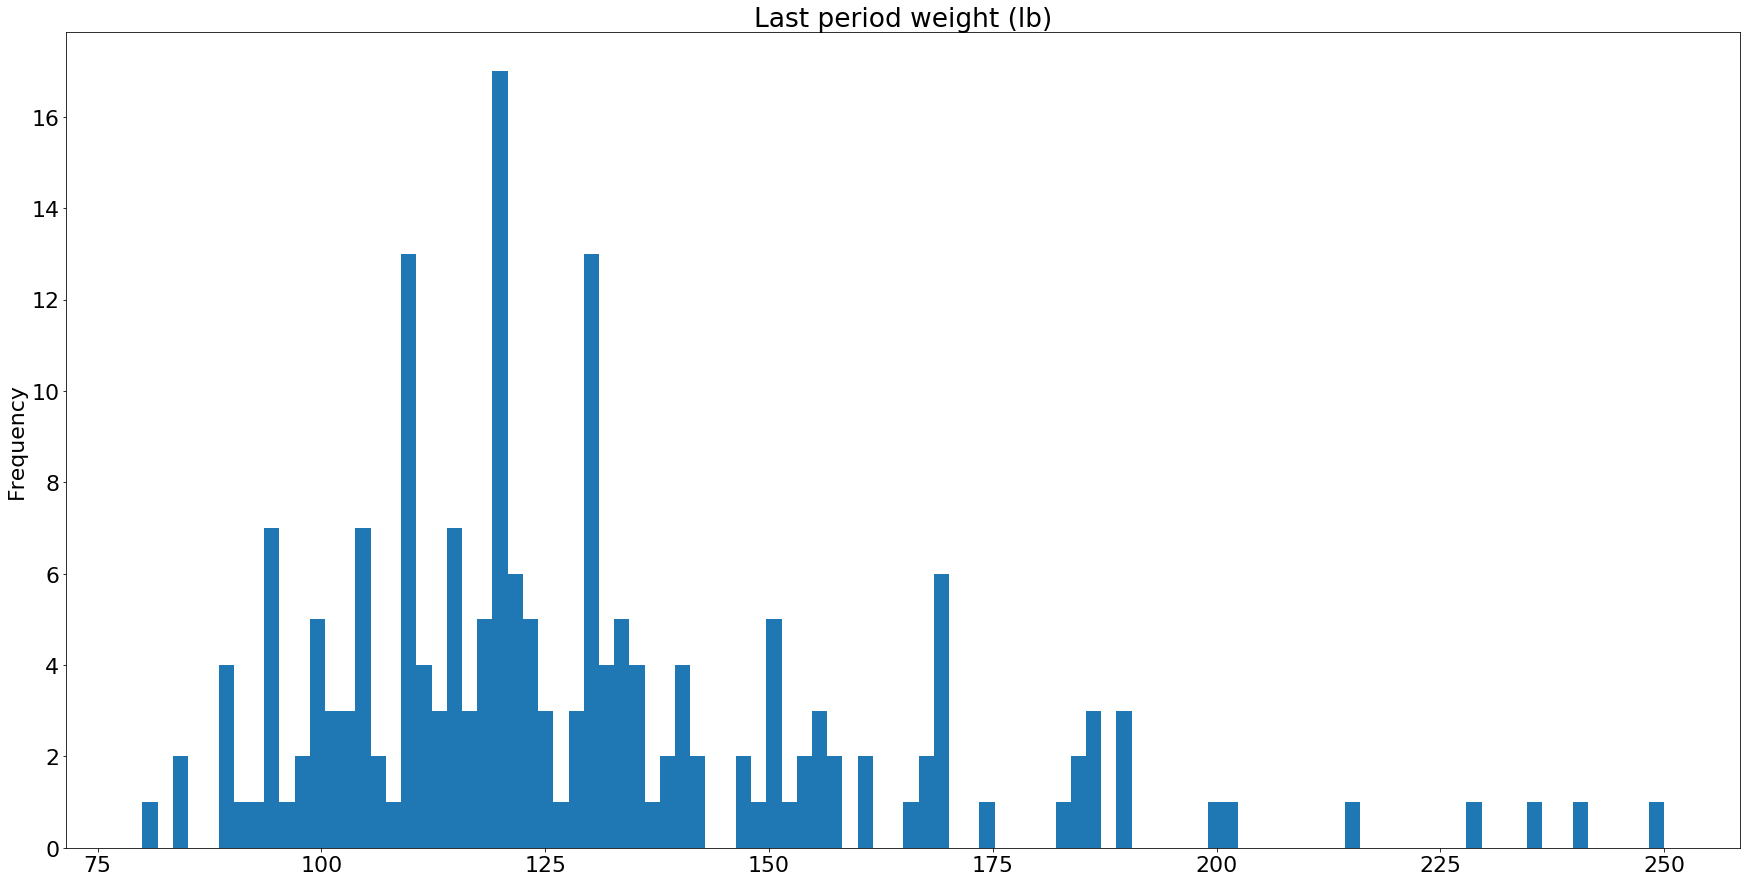

In [14]:
des('Last period weight (lb)')

lwt_log
4.787492    17
4.867534    13
4.700480    11
4.653960     7
4.744932     7
            ..
5.105945     1
4.682131     1
4.875197     1
5.164786     1
4.564348     1
Name: lwt_log, Length: 75, dtype: int64
mean: 4.841782524417278
std: 0.21552347605548244
skewness: 0.7221771835800096
kurtosis: 0.541267222205879
cv: 0.0445132500207496


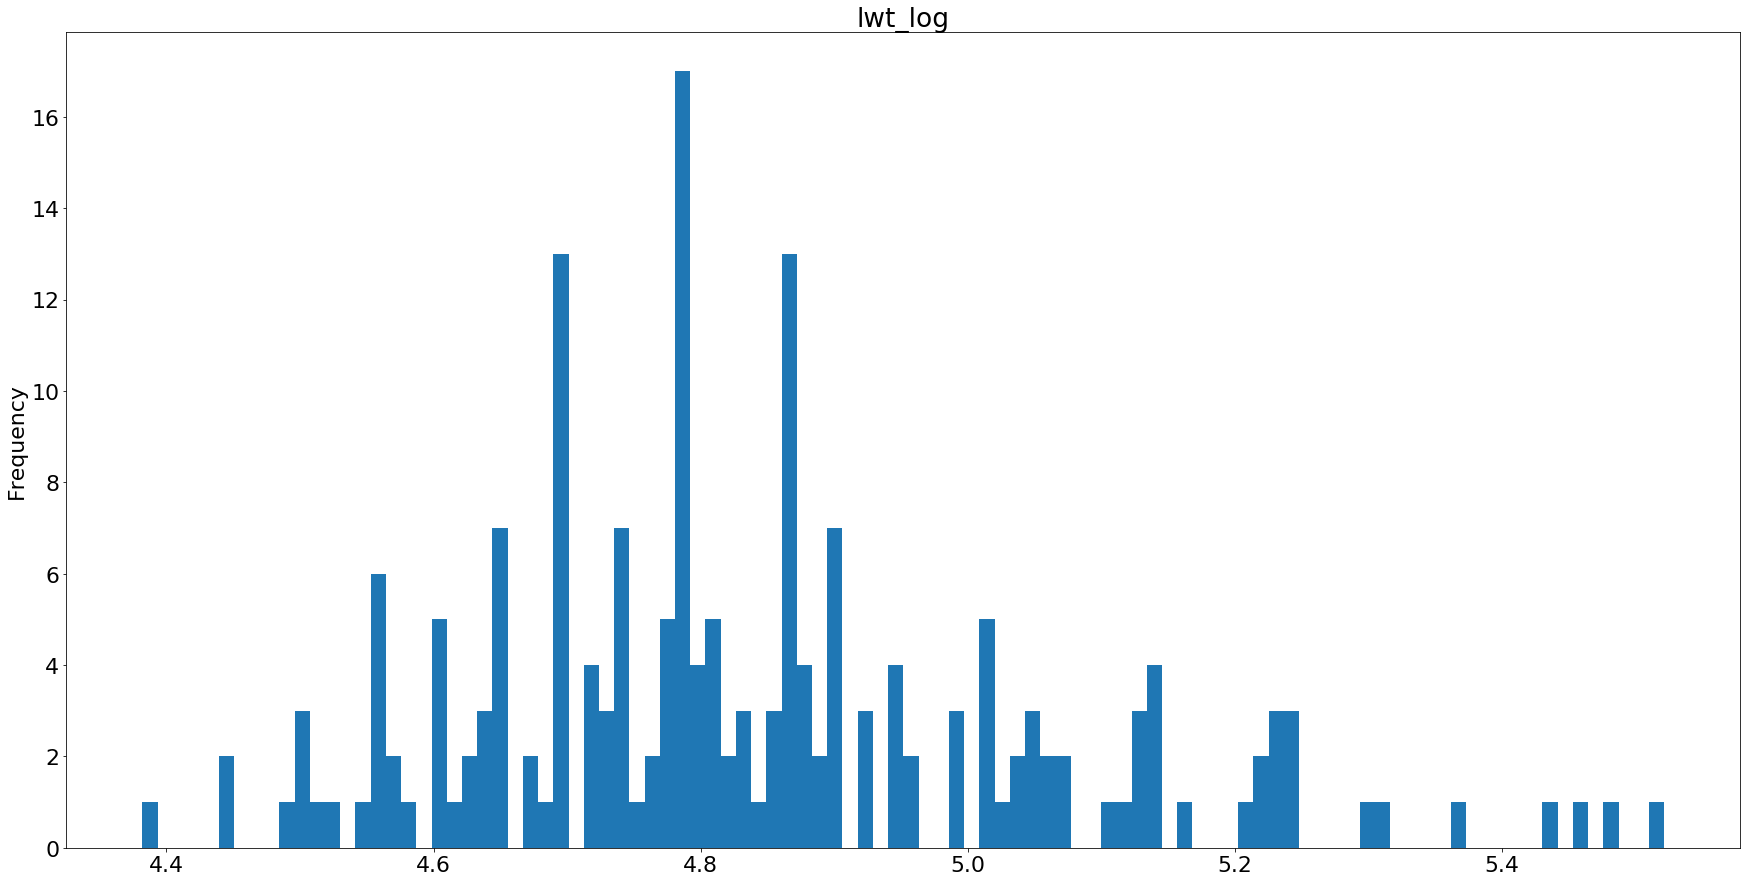

In [15]:
des('lwt_log')

In [11]:
row_df

,Infant birth weight (gm),Infant birth weight group,Age of mother (years),Last period weight (lb),Race of mother,Smoked during pregnancy,History of premature labor,History of hypertension,Uterine irritability,bwt,race,smoke,ptl,ht,ui,age_log,lwt_log
ID,,,,,,,,,,,,,,,,,
85,2523,normal,19,182,black,no,no,no,yes,0.0,2.0,-1.0,-1.0,-1.0,1.0,2.944439,5.204007
86,2551,normal,33,155,other,no,no,no,no,0.0,3.0,-1.0,-1.0,-1.0,-1.0,3.496508,5.043425
87,2557,normal,20,105,white,yes,no,no,no,0.0,1.0,1.0,-1.0,-1.0,-1.0,2.995732,4.653960
88,2594,normal,21,108,white,yes,no,no,yes,0.0,1.0,1.0,-1.0,-1.0,1.0,3.044522,4.682131
89,2600,normal,18,107,white,yes,no,no,yes,0.0,1.0,1.0,-1.0,-1.0,1.0,2.890372,4.672829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2466,low,28,95,white,yes,no,no,no,1.0,1.0,1.0,-1.0,-1.0,-1.0,3.332205,4.553877
81,2495,low,14,100,other,no,no,no,no,1.0,3.0,-1.0,-1.0,-1.0,-1.0,2.639057,4.605170
82,2495,low,23,94,other,yes,no,no,no,1.0,3.0,1.0,-1.0,-1.0,-1.0,3.135494,4.543295


In [18]:
ttest_ind(row_df[row_df['Smoked during pregnancy'] == 'yes']['Infant birth weight (gm)'], row_df[row_df['Smoked during pregnancy'] == 'no']['Infant birth weight (gm)'])

Ttest_indResult(statistic=-2.633603916360199, pvalue=0.00915566003163672)

In [19]:
ttest_ind(row_df[row_df['History of premature labor'] == 'yes']['Infant birth weight (gm)'], row_df[row_df['History of premature labor'] == 'no']['Infant birth weight (gm)'])

Ttest_indResult(statistic=-3.0576310890919585, pvalue=0.0025579821195333297)

In [20]:
ttest_ind(row_df[row_df['History of hypertension'] == 'yes']['Infant birth weight (gm)'], row_df[row_df['History of hypertension'] == 'no']['Infant birth weight (gm)'])

Ttest_indResult(statistic=-2.0192015645095878, pvalue=0.04489411742446722)

In [22]:
ttest_ind(row_df[row_df['Uterine irritability'] == 'yes']['Infant birth weight (gm)'], row_df[row_df['Uterine irritability'] == 'no']['Infant birth weight (gm)'])

Ttest_indResult(statistic=-4.04217005878041, pvalue=7.731588117100976e-05)

In [26]:
f_oneway(row_df[row_df['Race of mother'] == 'black']['Infant birth weight (gm)'],row_df[row_df['Race of mother'] == 'white']['Infant birth weight (gm)'],row_df[row_df['Race of mother'] == 'other']['Infant birth weight (gm)'])

F_onewayResult(statistic=4.971894410448425, pvalue=0.007879055861064493)

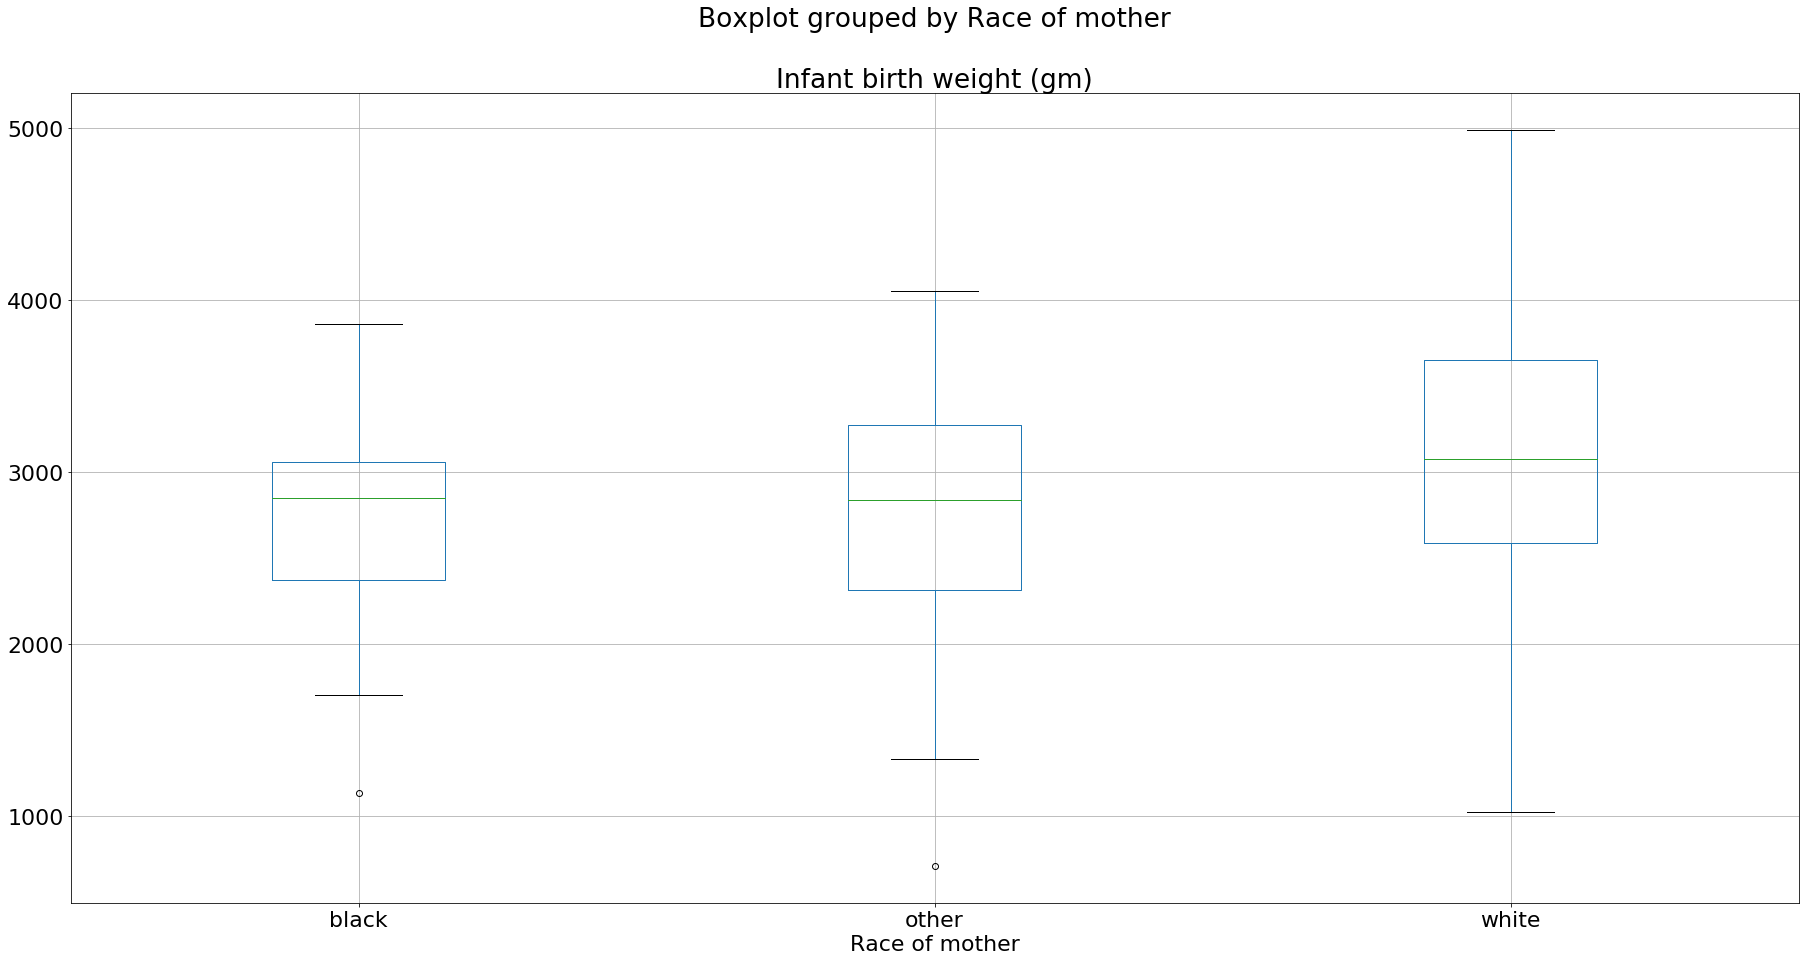

In [22]:
row_df.boxplot(column="Infant birth weight (gm)", by="Race of mother")

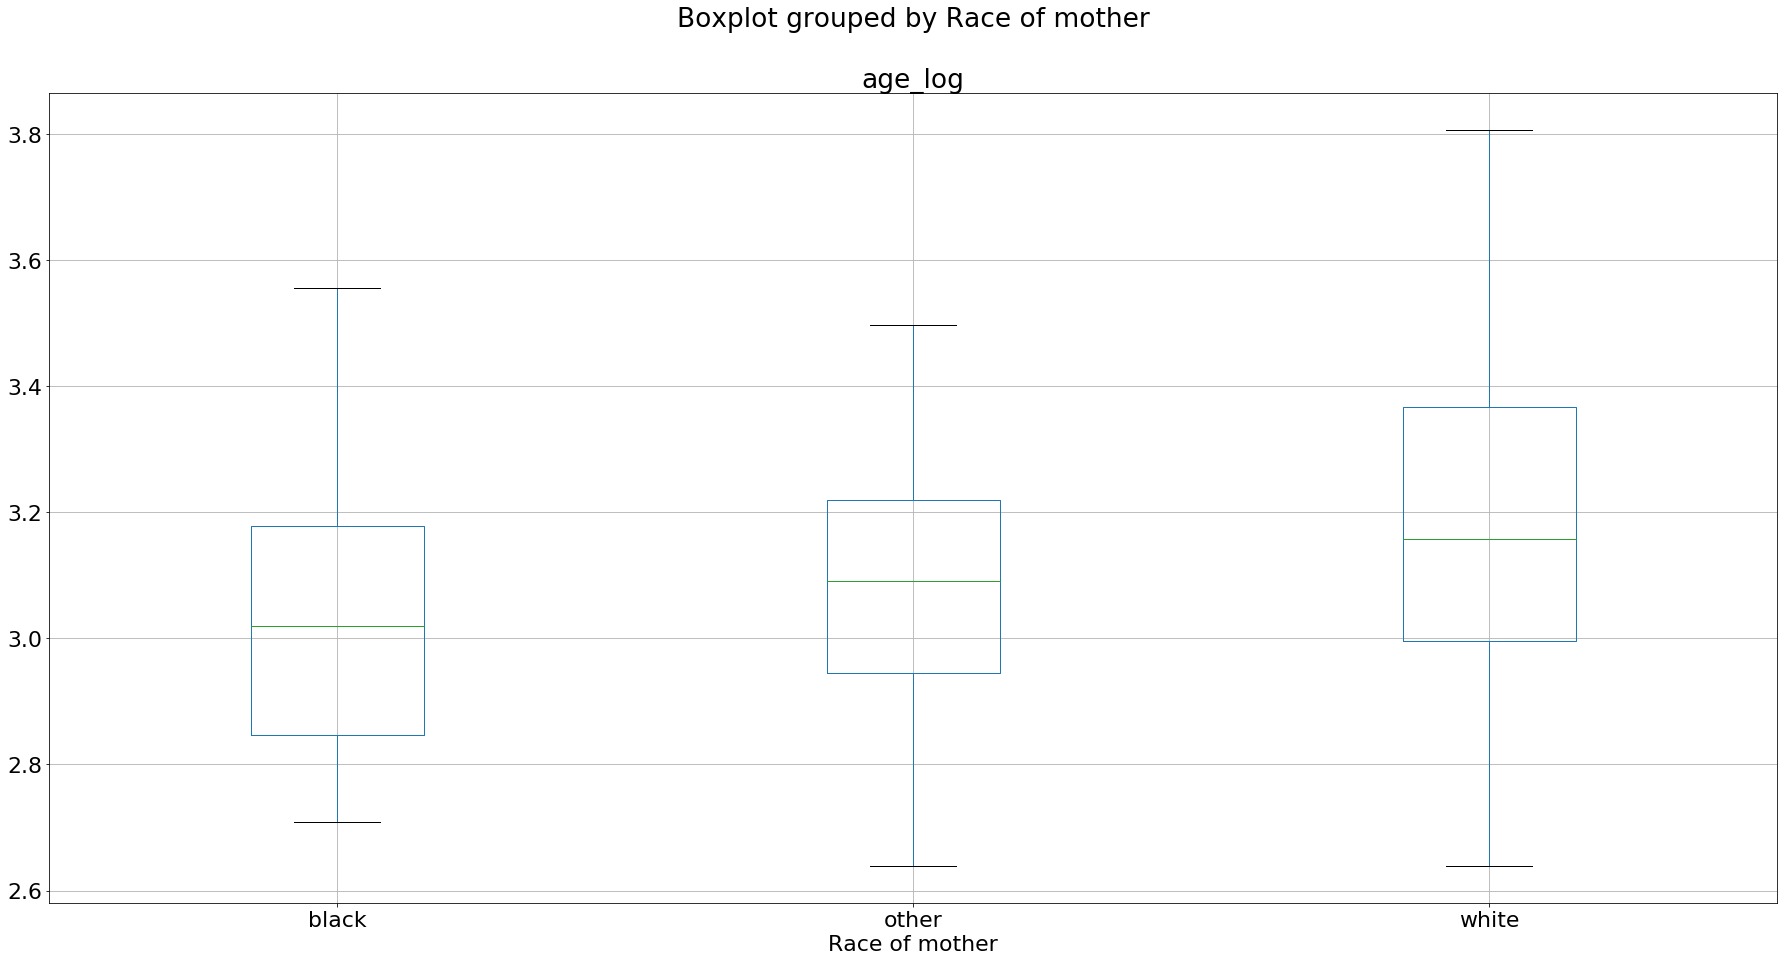

In [23]:
row_df.boxplot(column="age_log", by="Race of mother")

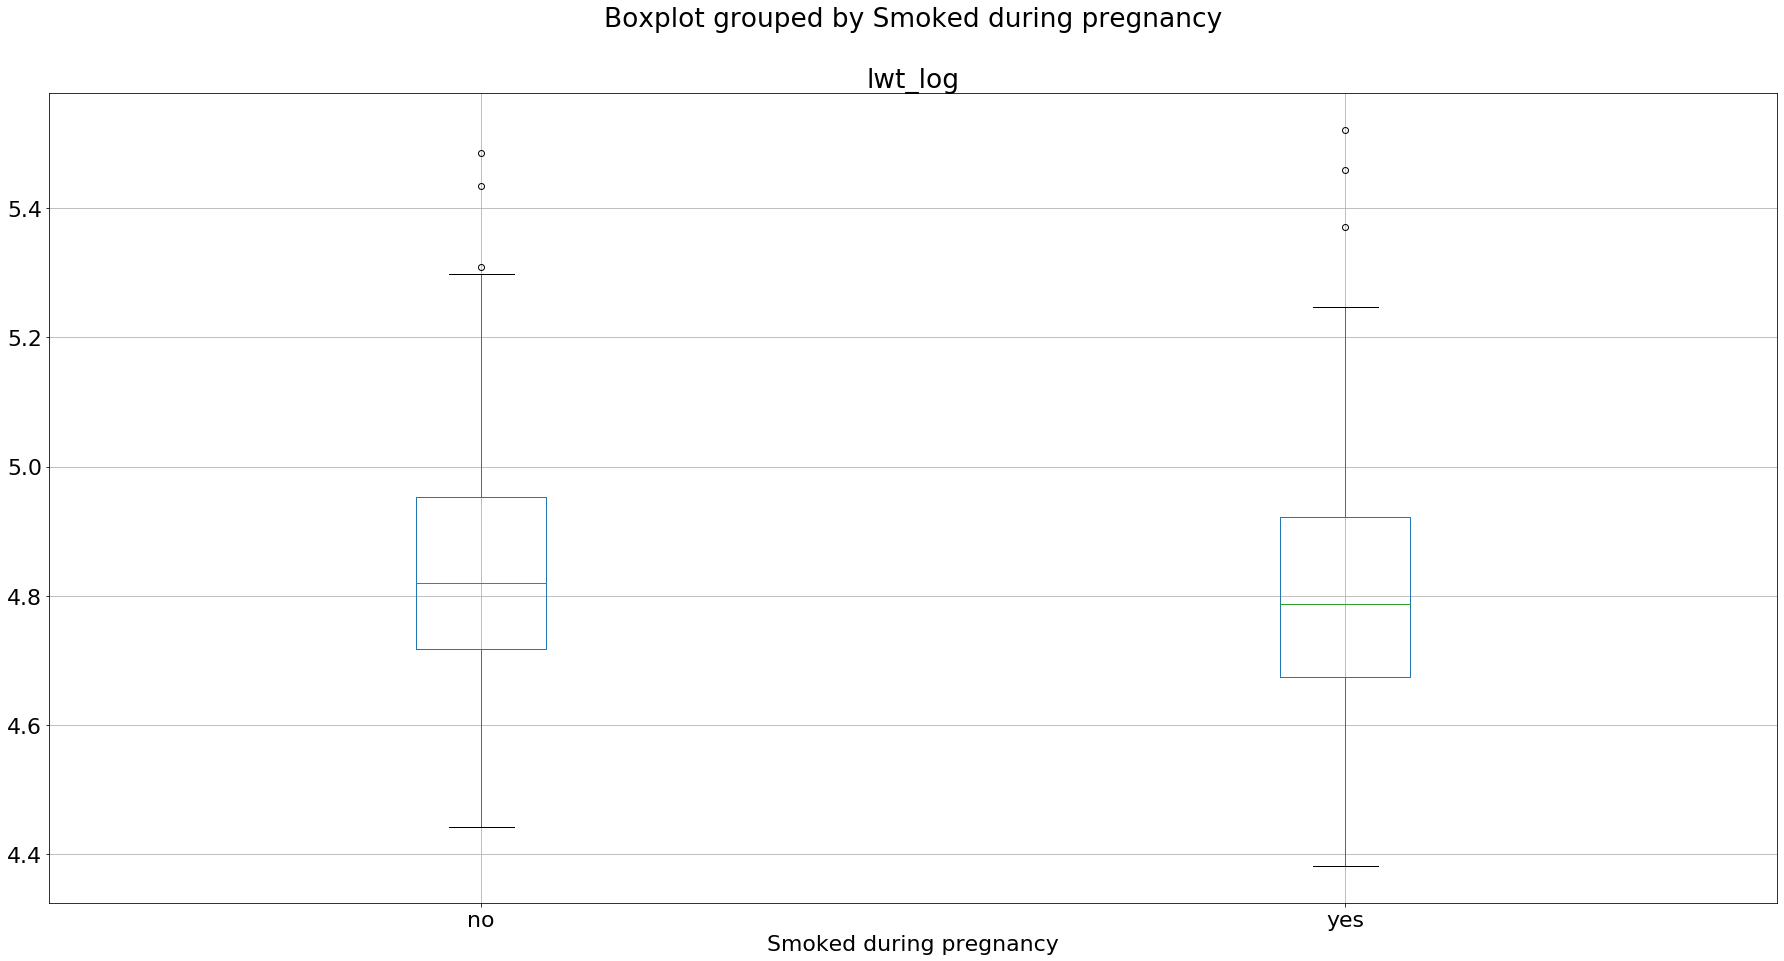

In [25]:
row_df.boxplot(column="lwt_log", by="Race of mother")

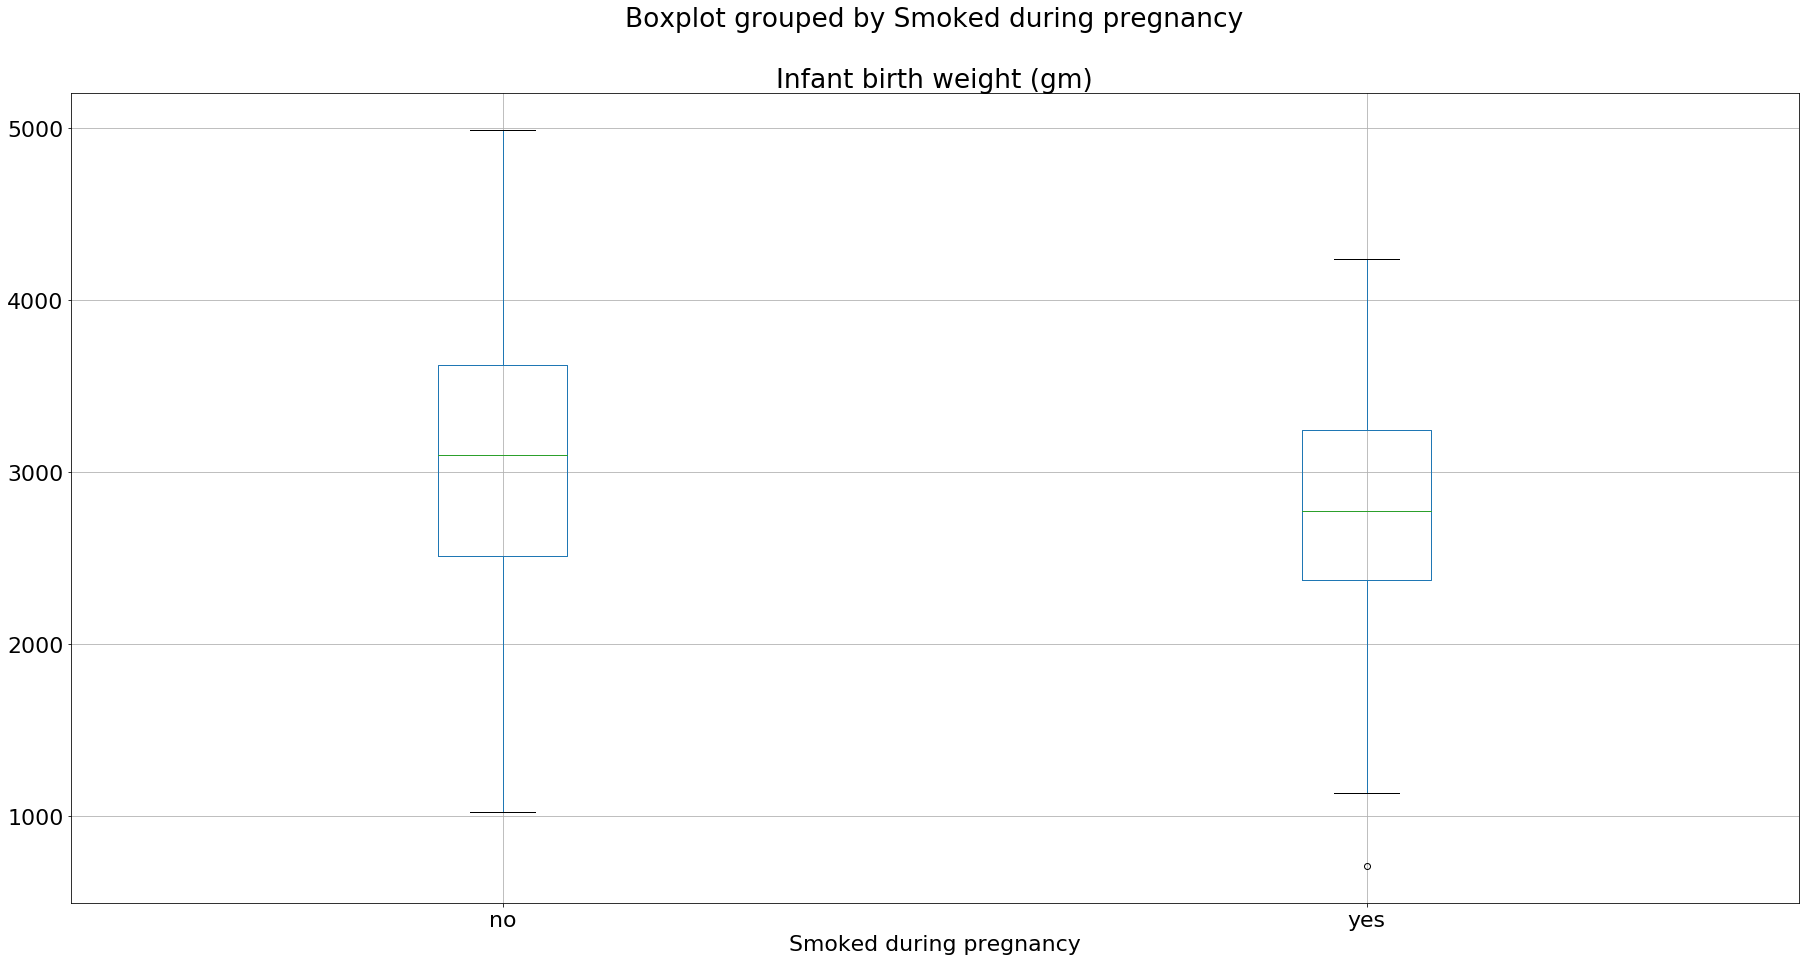

In [26]:
row_df.boxplot(column="Infant birth weight (gm)", by="Smoked during pregnancy")

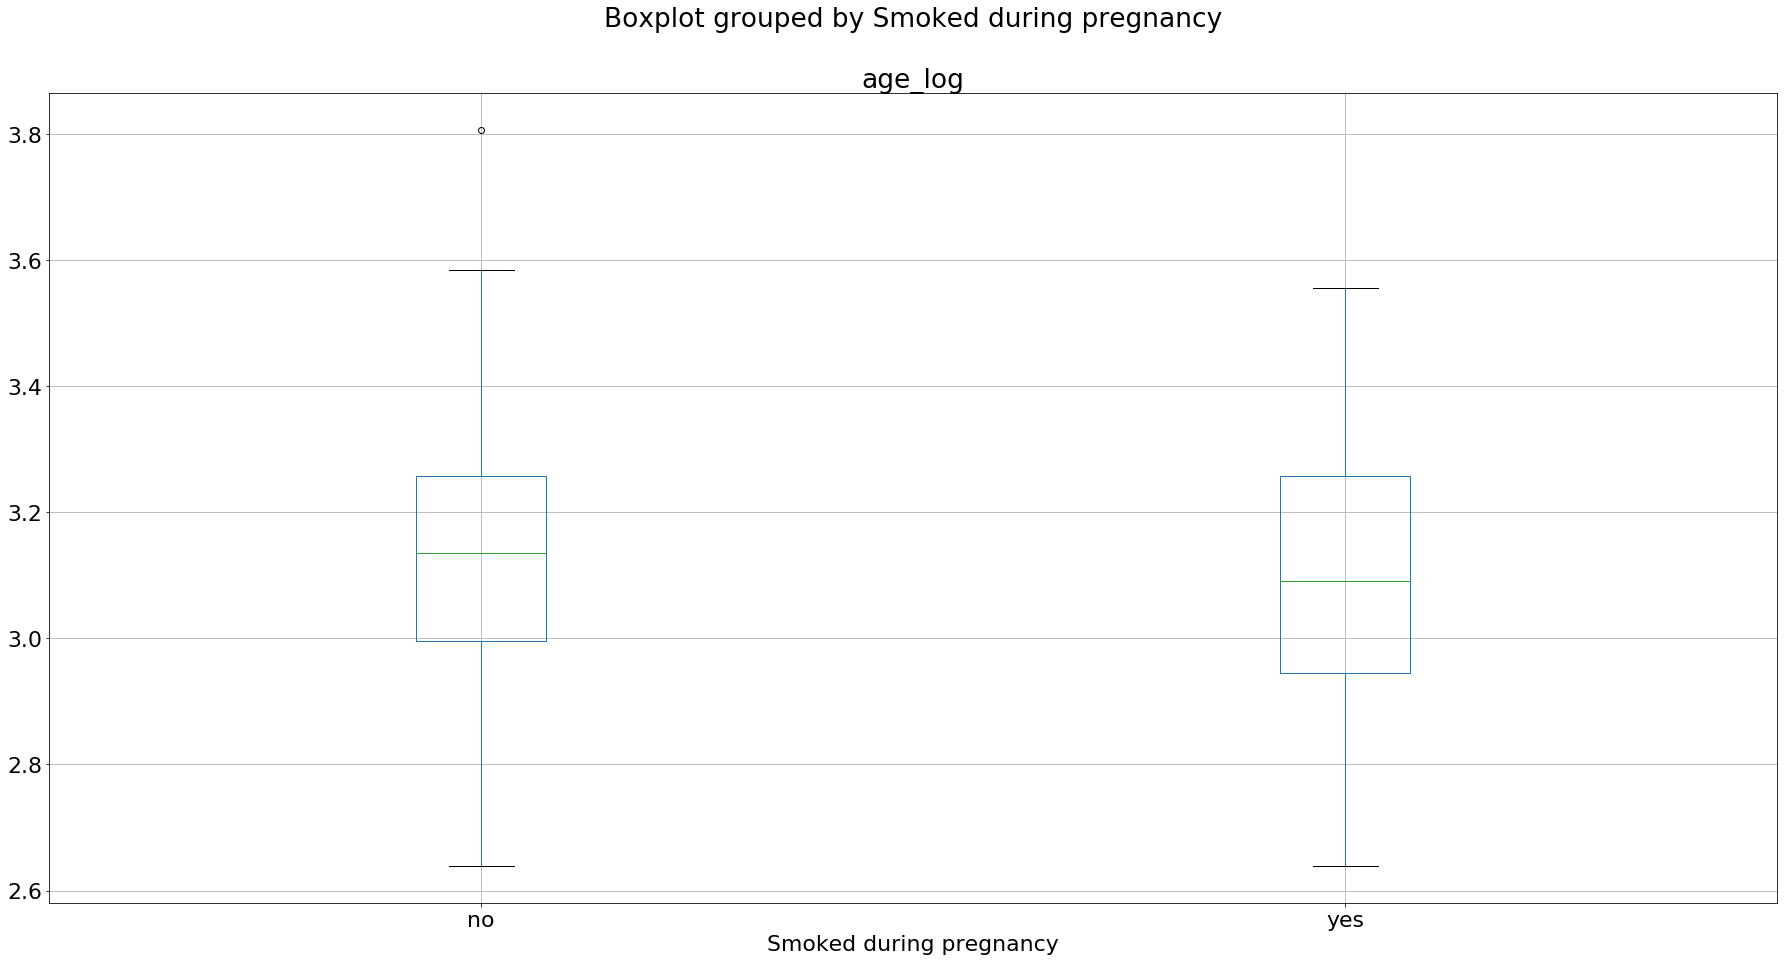

In [27]:
row_df.boxplot(column="age_log", by="Smoked during pregnancy")

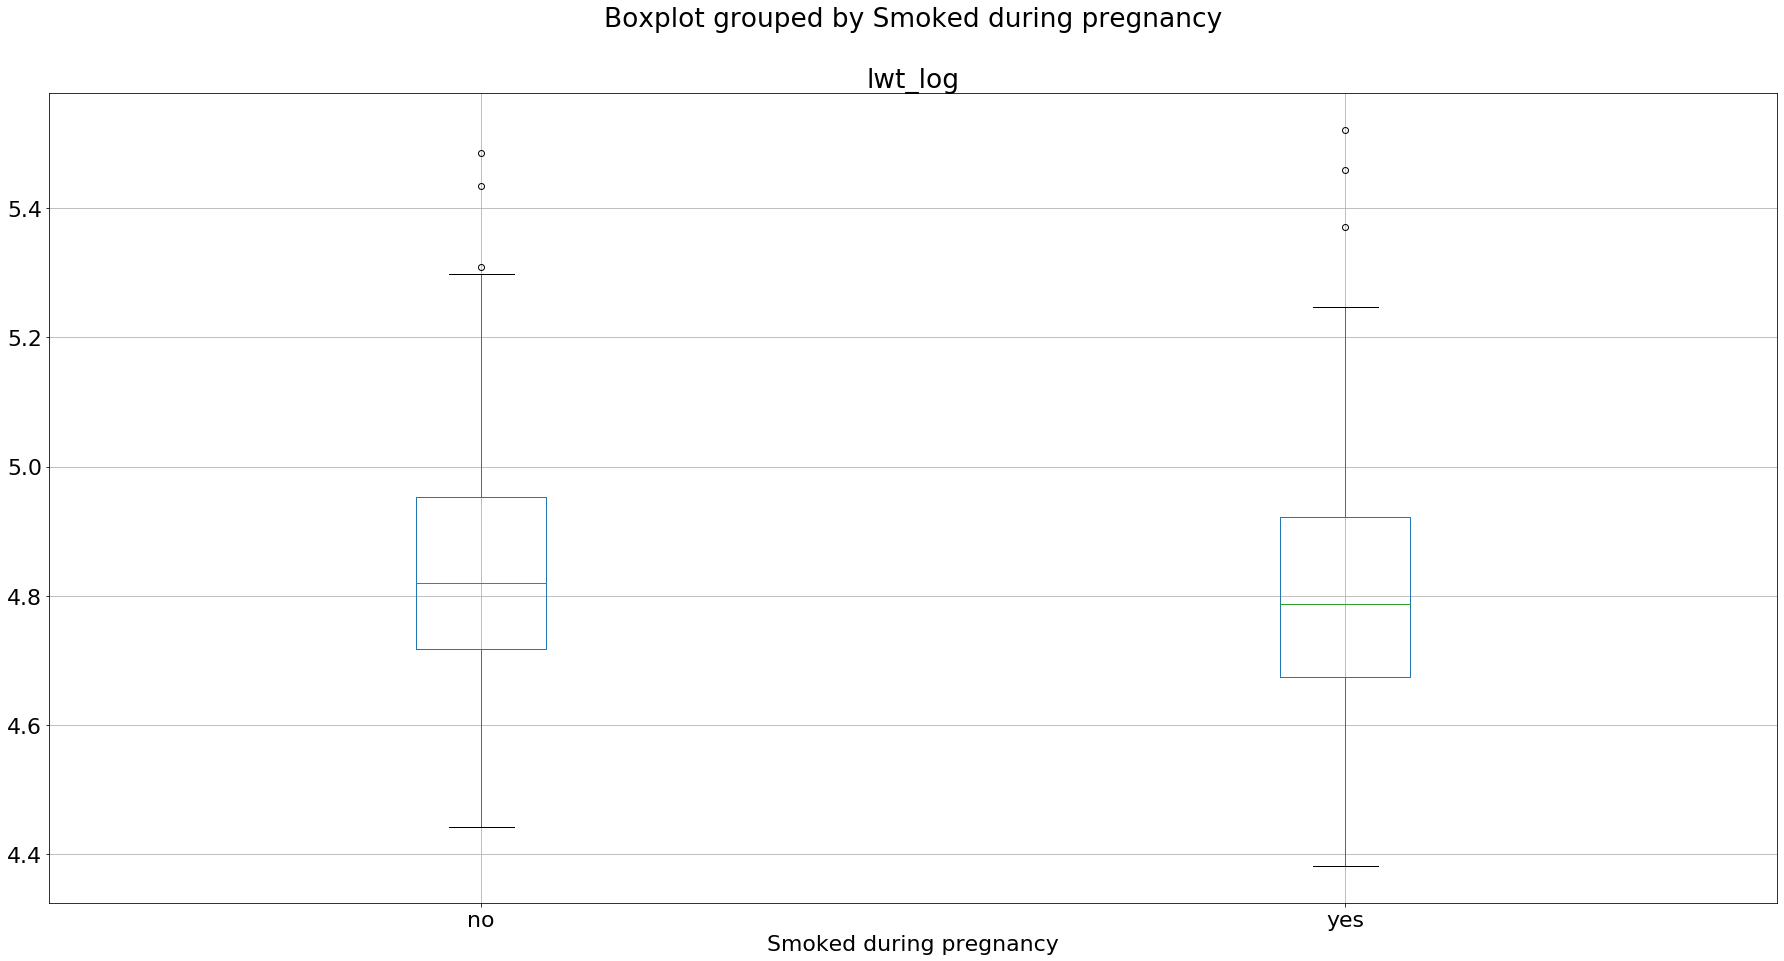

In [28]:
row_df.boxplot(column="lwt_log", by="Smoked during pregnancy")

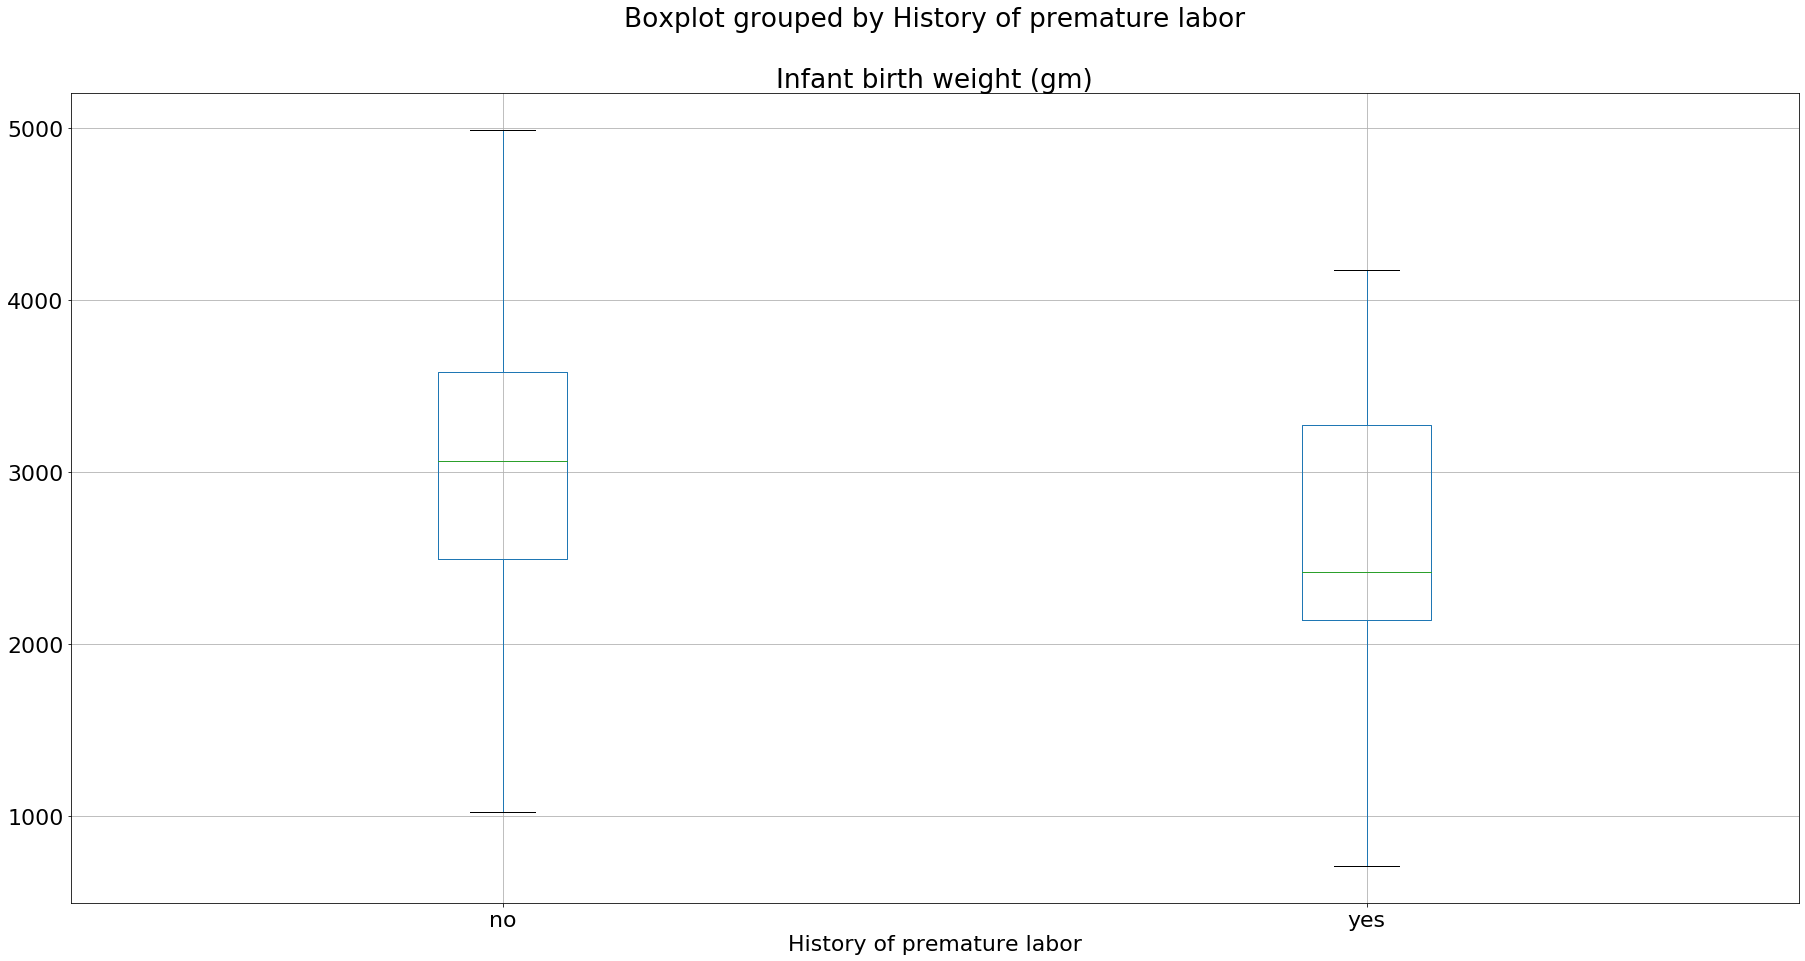

In [29]:
row_df.boxplot(column="Infant birth weight (gm)", by="History of premature labor")

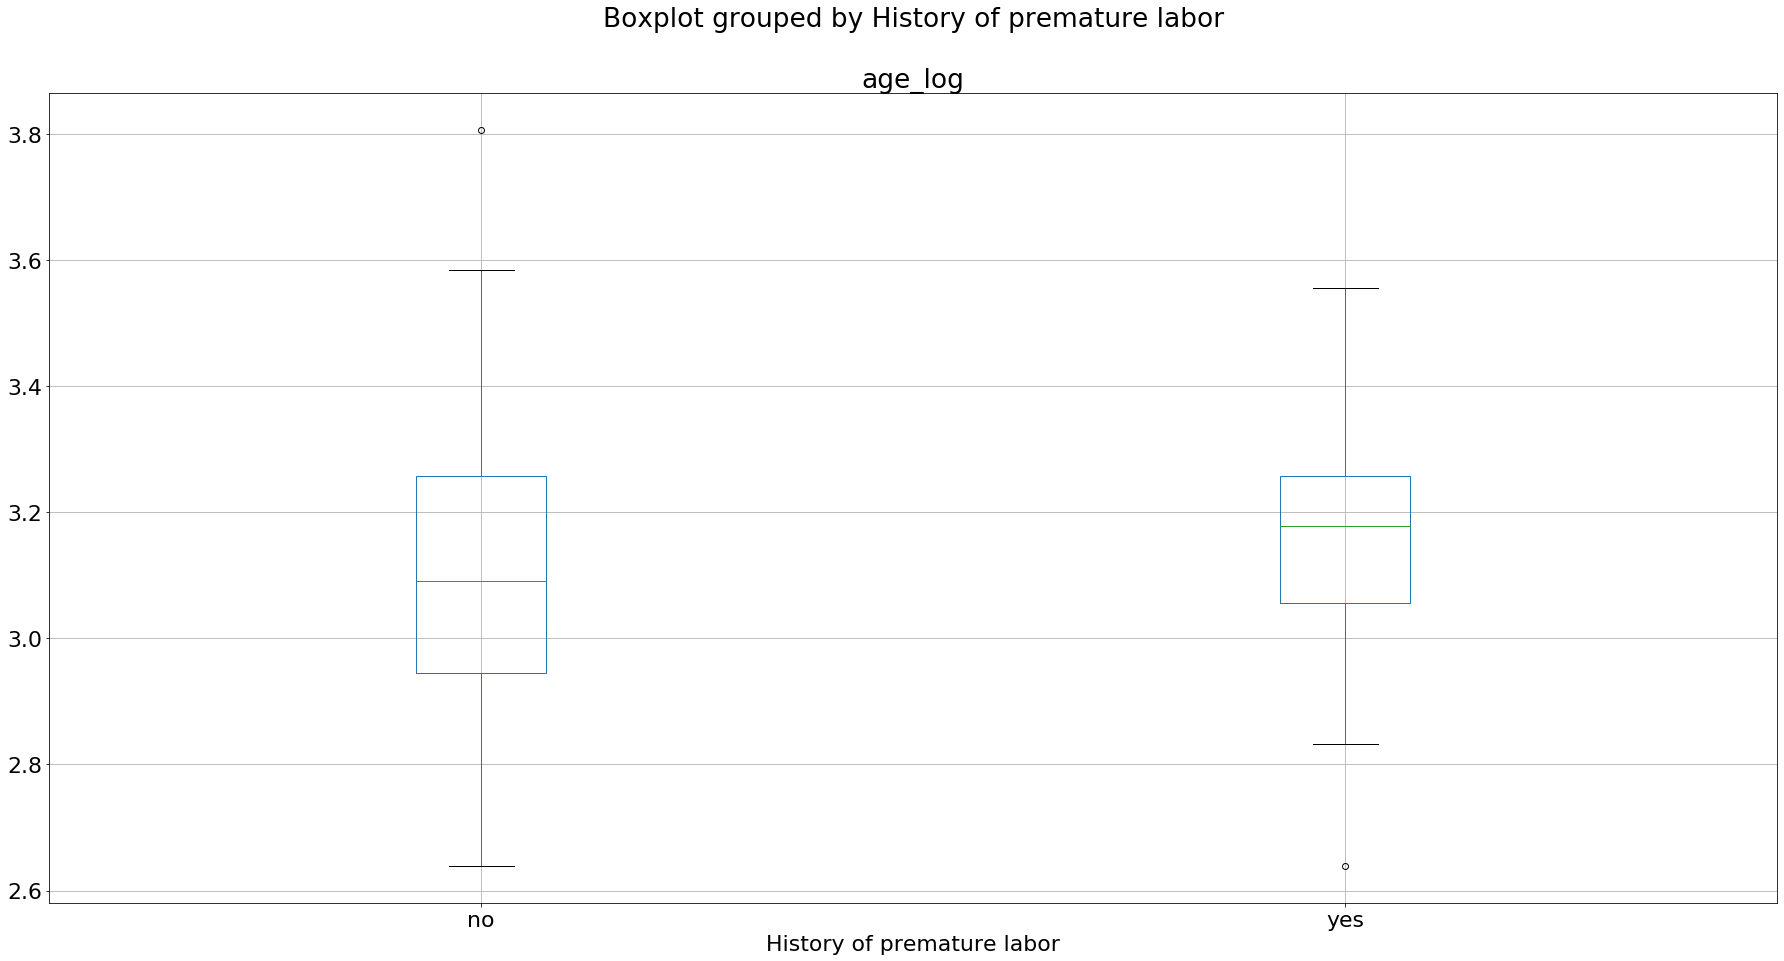

In [30]:
row_df.boxplot(column="age_log", by="History of premature labor")

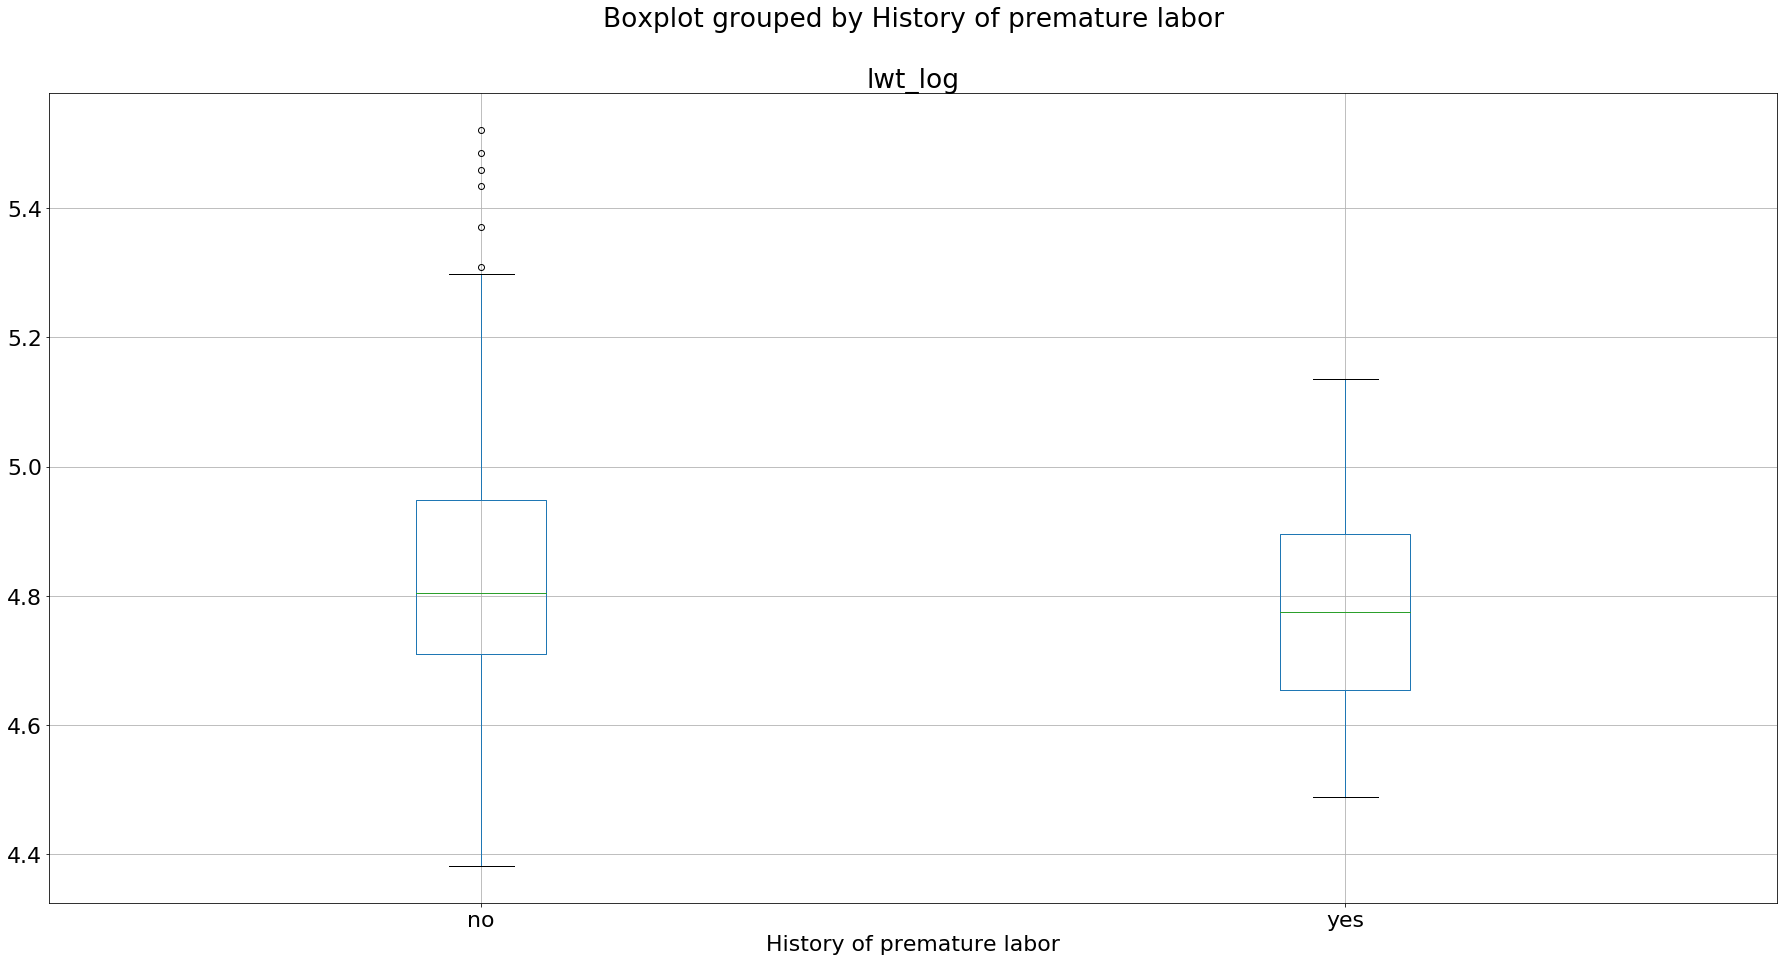

In [31]:
row_df.boxplot(column="lwt_log", by="History of premature labor")

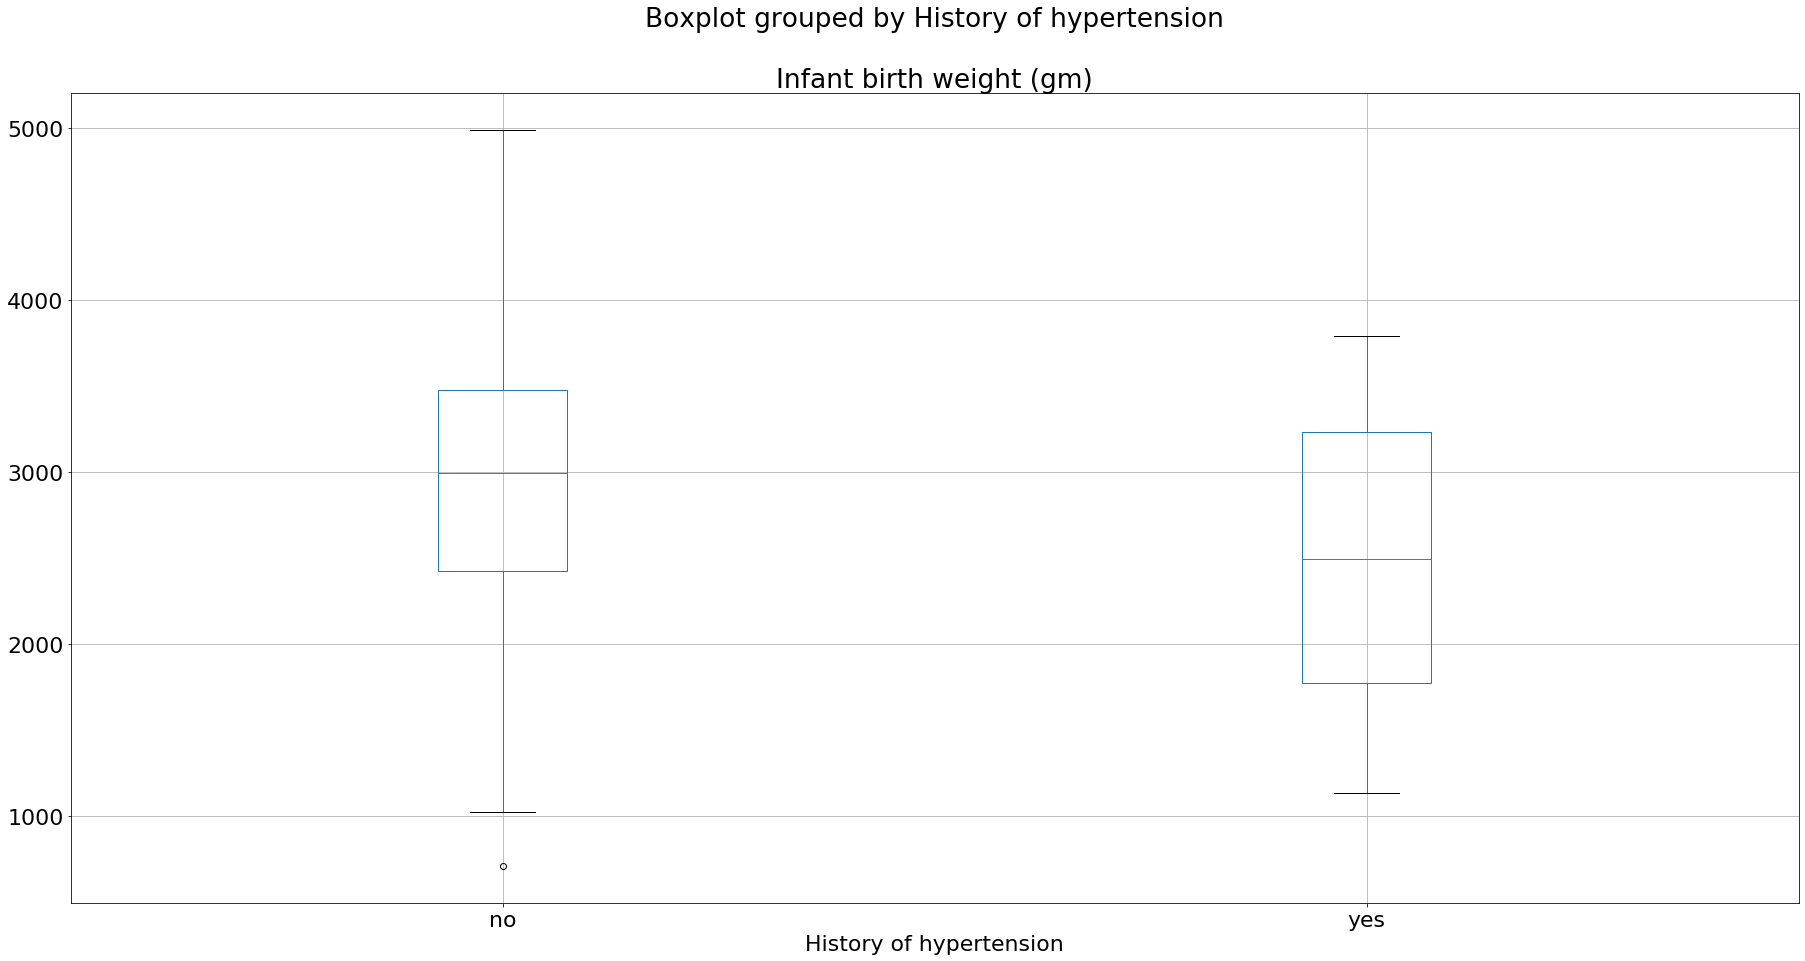

In [32]:
row_df.boxplot(column="Infant birth weight (gm)", by="History of hypertension")

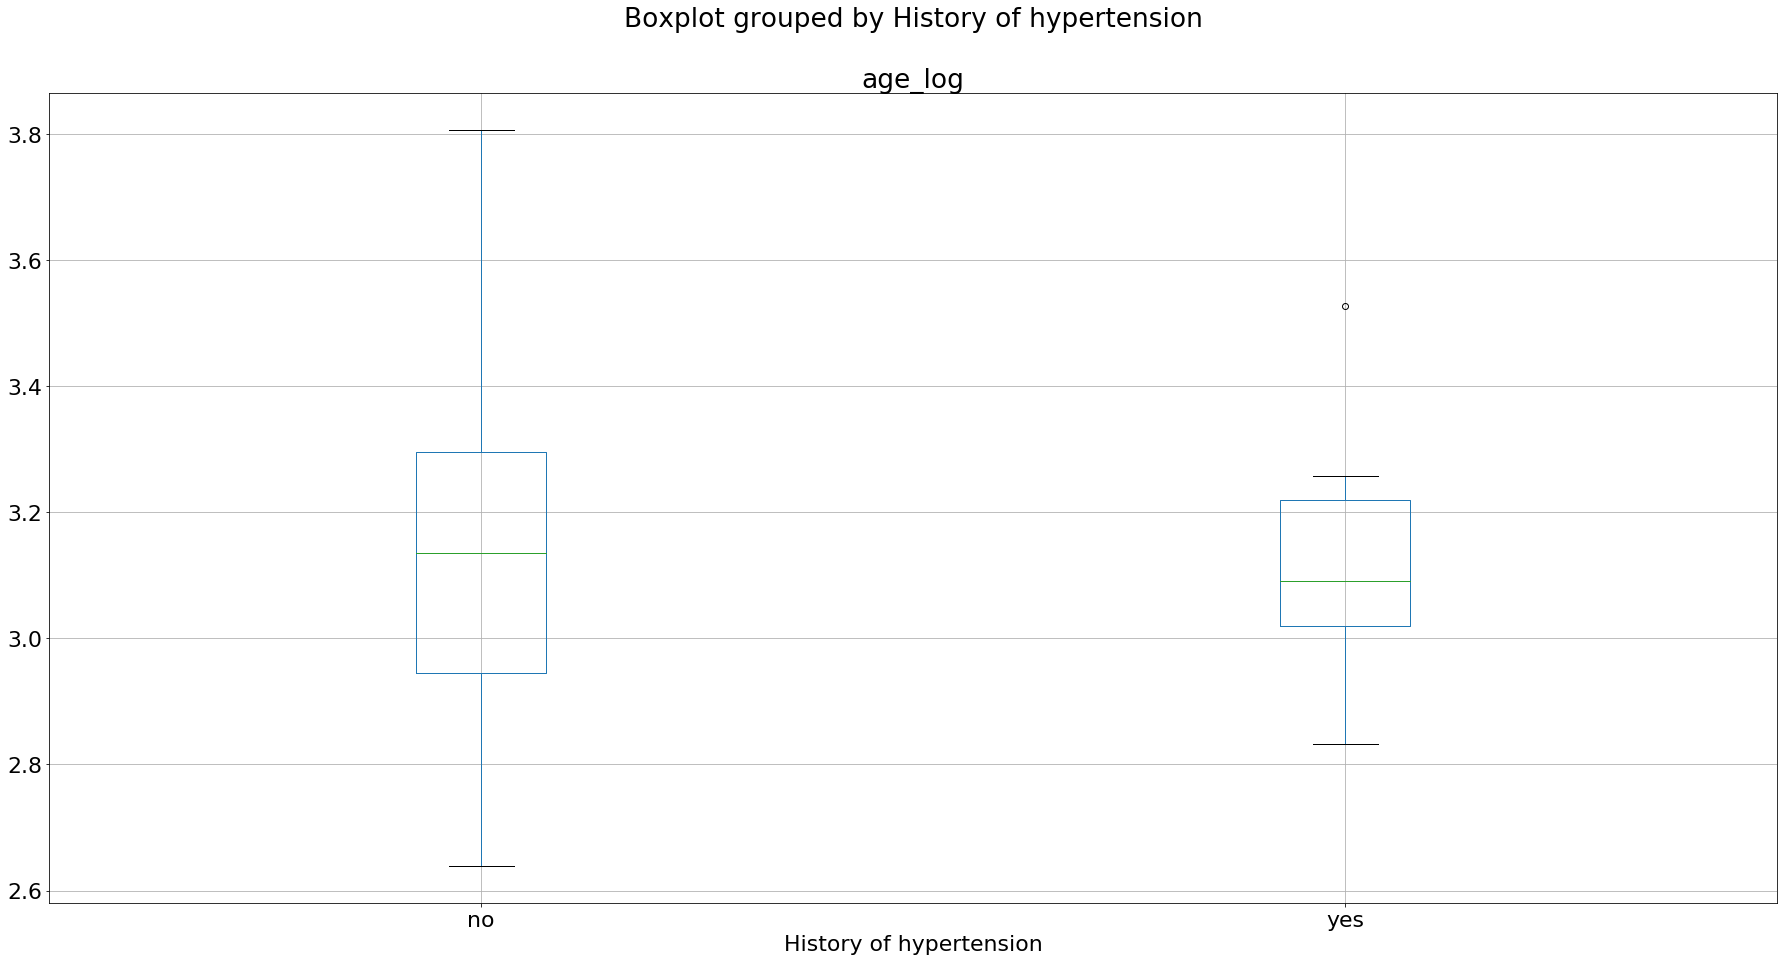

In [33]:
row_df.boxplot(column="age_log", by="History of hypertension")

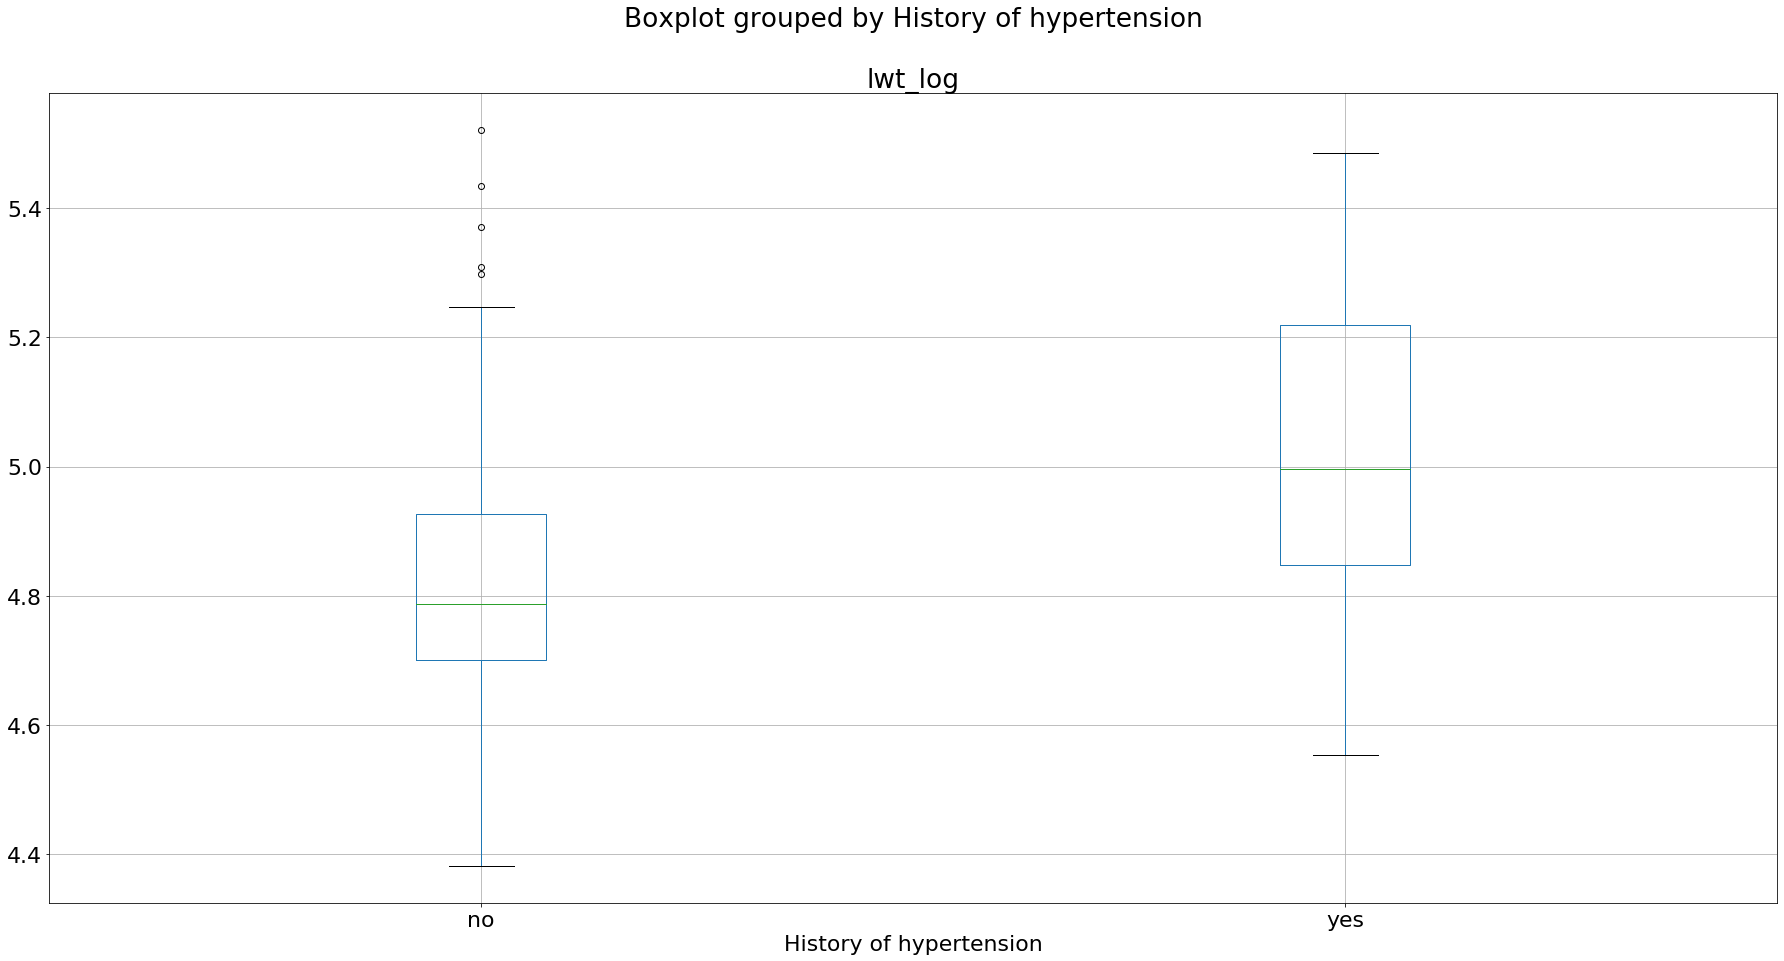

In [34]:
row_df.boxplot(column="lwt_log", by="History of hypertension")

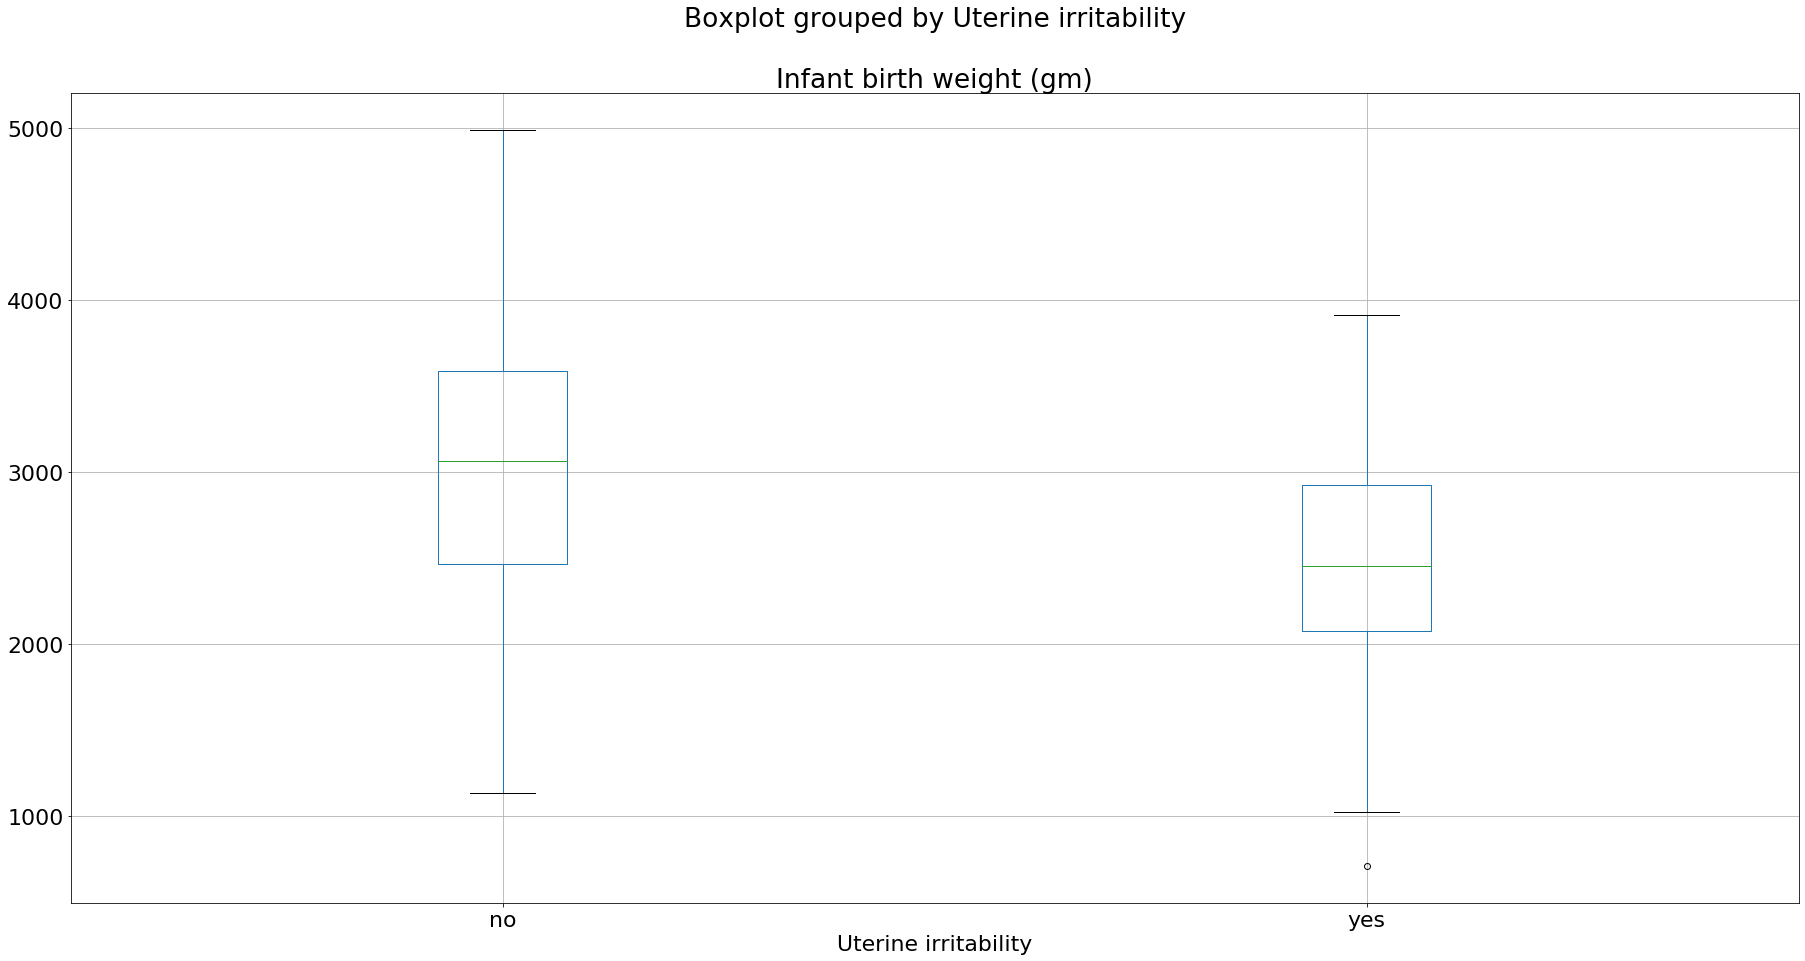

In [35]:
row_df.boxplot(column="Infant birth weight (gm)", by="Uterine irritability")

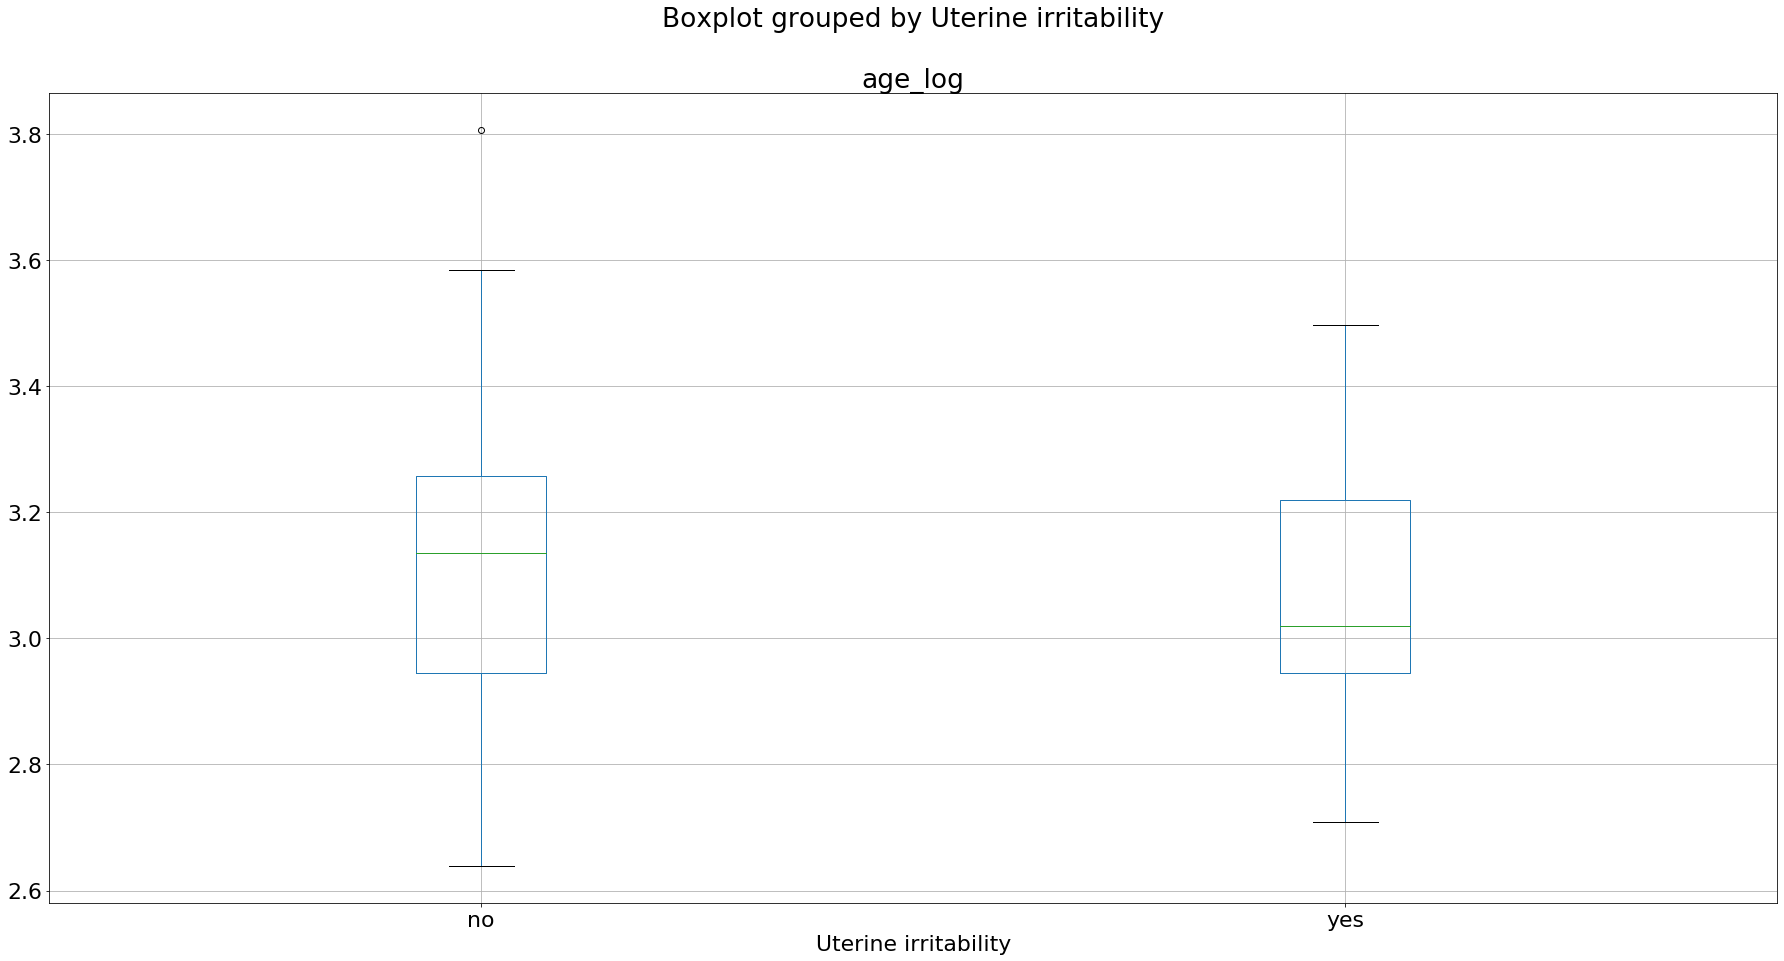

In [36]:
row_df.boxplot(column="age_log", by="Uterine irritability")

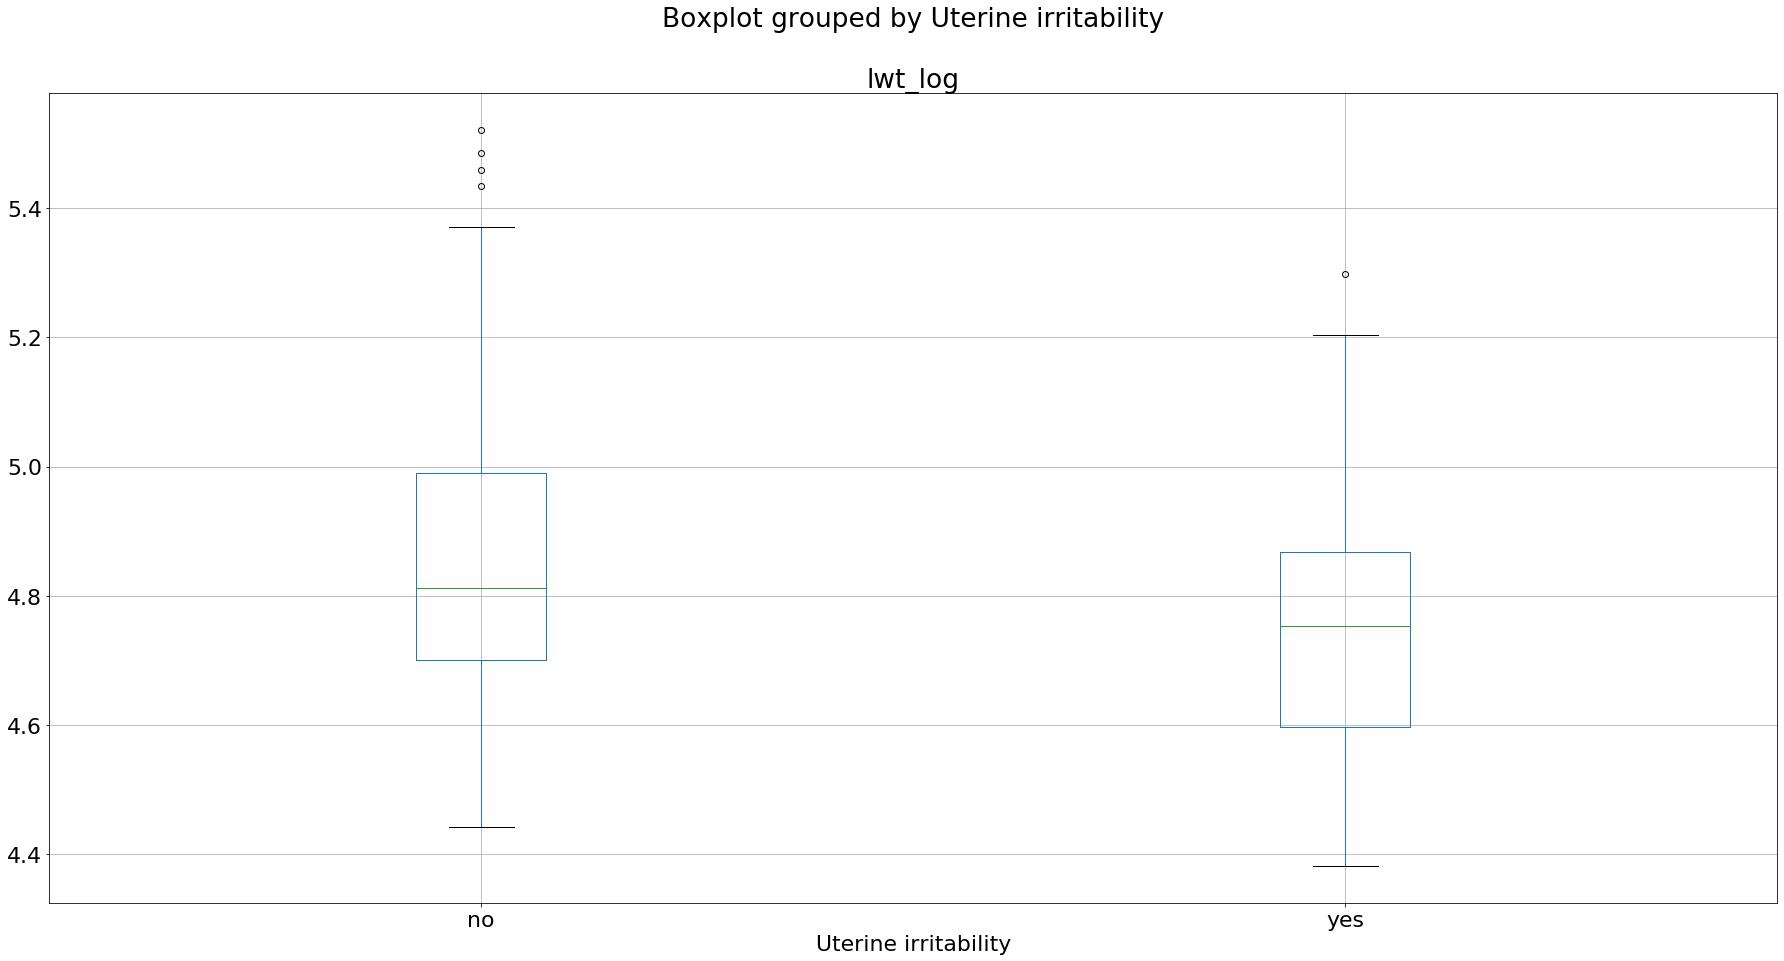

In [37]:
row_df.boxplot(column="lwt_log", by="Uterine irritability")

In [16]:
row_df[['age_log','lwt_log','smoke','ht','ptl','ui','race','bwt']].to_csv('0624_MONB_XY.csv', header = True, index = False)

In [17]:
row_df = row_df.reset_index()
row_df = row_df[['age_log','lwt_log','smoke','ht','ptl','ui','race','bwt']]

In [18]:
row_df

,age_log,lwt_log,smoke,ht,ptl,ui,race,bwt
0,2.944439,5.204007,-1.0,-1.0,-1.0,1.0,2.0,1.0
1,3.496508,5.043425,-1.0,-1.0,-1.0,-1.0,3.0,1.0
2,2.995732,4.653960,1.0,-1.0,-1.0,-1.0,1.0,1.0
3,3.044522,4.682131,1.0,-1.0,-1.0,1.0,1.0,1.0
4,2.890372,4.672829,1.0,-1.0,-1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
184,3.332205,4.553877,1.0,-1.0,-1.0,-1.0,1.0,0.0
185,2.639057,4.605170,-1.0,-1.0,-1.0,-1.0,3.0,0.0
186,3.135494,4.543295,1.0,-1.0,-1.0,-1.0,3.0,0.0
187,2.833213,4.955827,-1.0,1.0,-1.0,-1.0,2.0,0.0


In [19]:
pd.set_option('display.max_rows', 14)
row_df[row_df.duplicated(keep = False, subset=['race','smoke','ptl','ht','ui','age_log','lwt_log'])]

,age_log,lwt_log,smoke,ht,ptl,ui,race,bwt
14,2.890372,4.605170,1.0,-1.0,-1.0,-1.0,1.0,1.0
15,2.890372,4.605170,1.0,-1.0,-1.0,-1.0,1.0,1.0
29,2.833213,4.727388,-1.0,-1.0,-1.0,-1.0,2.0,1.0
30,2.833213,4.727388,-1.0,-1.0,-1.0,-1.0,2.0,1.0
44,2.890372,4.499810,1.0,-1.0,-1.0,1.0,1.0,1.0
45,2.890372,4.499810,1.0,-1.0,-1.0,1.0,1.0,1.0
52,3.091042,4.867534,1.0,-1.0,-1.0,-1.0,1.0,1.0
59,2.833213,4.779123,-1.0,-1.0,-1.0,-1.0,3.0,1.0
60,2.833213,4.779123,-1.0,-1.0,-1.0,-1.0,3.0,1.0
74,2.772589,4.905275,1.0,-1.0,-1.0,-1.0,1.0,1.0


In [20]:
row_df.drop(15, axis = 0, inplace = True)
row_df.drop(30, axis = 0, inplace = True)
row_df.drop(45, axis = 0, inplace = True)
row_df.drop(60, axis = 0, inplace = True)
row_df.drop(94, axis = 0, inplace = True)
row_df.drop(98, axis = 0, inplace = True)
row_df.drop(52, axis = 0, inplace = True)
row_df.drop(176, axis = 0, inplace = True)

In [21]:
row_df

,age_log,lwt_log,smoke,ht,ptl,ui,race,bwt
0,2.944439,5.204007,-1.0,-1.0,-1.0,1.0,2.0,1.0
1,3.496508,5.043425,-1.0,-1.0,-1.0,-1.0,3.0,1.0
2,2.995732,4.653960,1.0,-1.0,-1.0,-1.0,1.0,1.0
3,3.044522,4.682131,1.0,-1.0,-1.0,1.0,1.0,1.0
4,2.890372,4.672829,1.0,-1.0,-1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
184,3.332205,4.553877,1.0,-1.0,-1.0,-1.0,1.0,0.0
185,2.639057,4.605170,-1.0,-1.0,-1.0,-1.0,3.0,0.0
186,3.135494,4.543295,1.0,-1.0,-1.0,-1.0,3.0,0.0
187,2.833213,4.955827,-1.0,1.0,-1.0,-1.0,2.0,0.0


age_log
2.995732    18
3.218876    15
2.944439    15
3.135494    13
3.178054    13
            ..
2.639057     3
3.555348     2
3.583519     2
3.806662     1
3.526361     1
Name: age_log, Length: 24, dtype: int64
mean: 3.1298504605980213
std: 0.22209078525335427


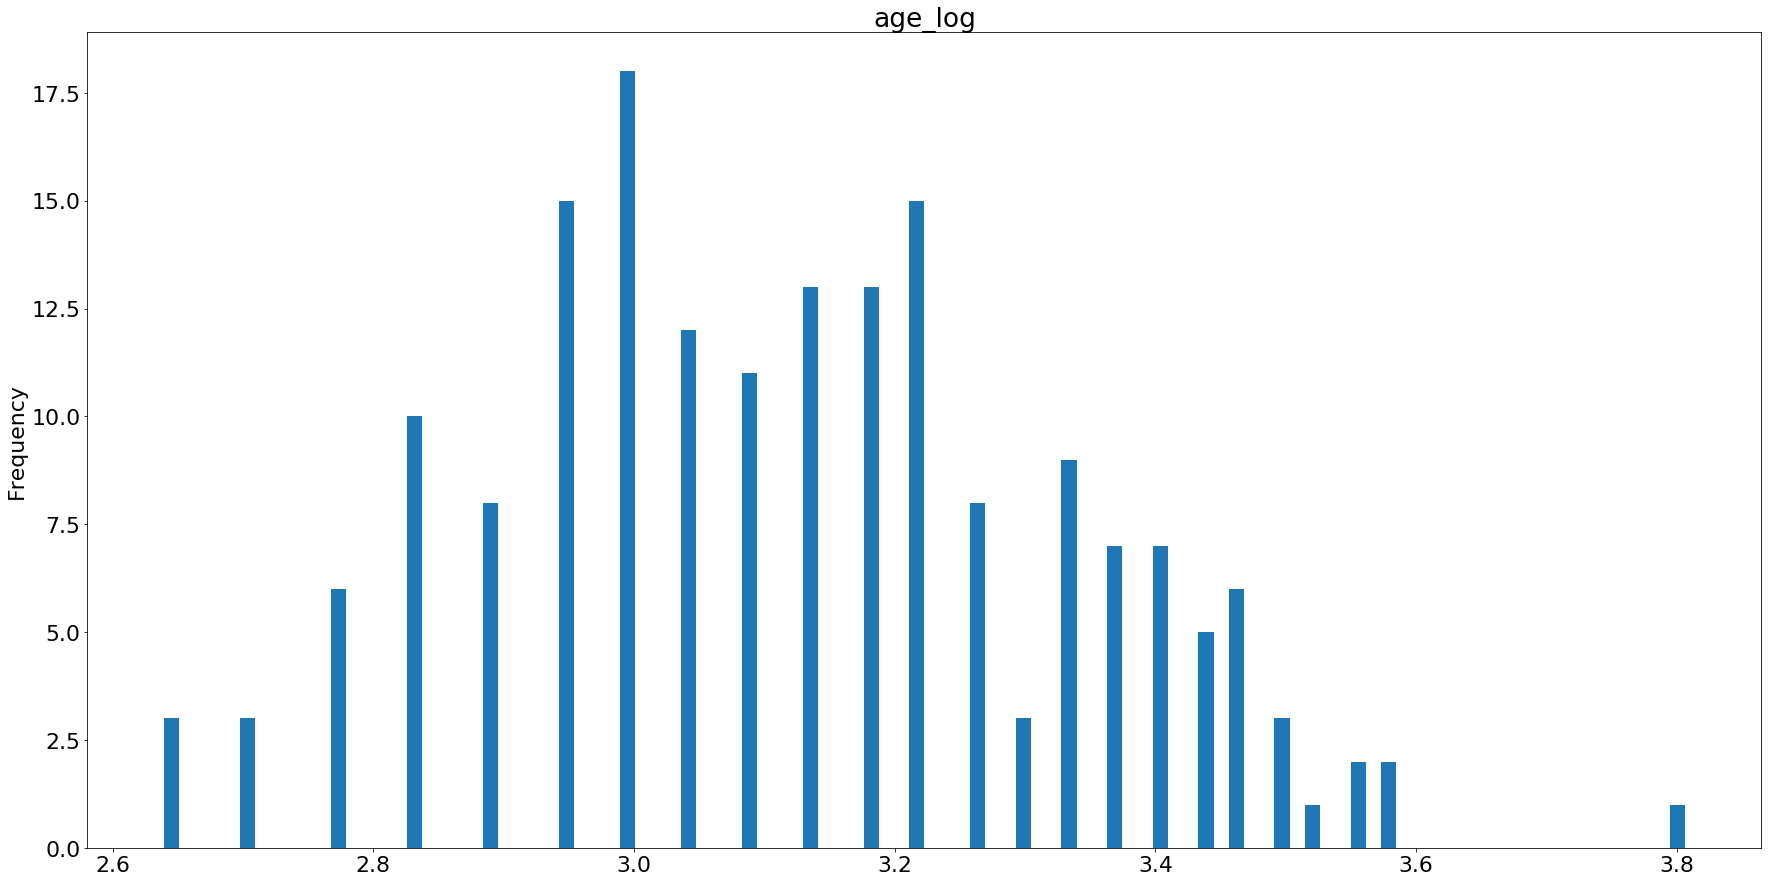

lwt_log
4.787492    17
4.700480    11
4.867534    11
4.653960     7
4.744932     7
            ..
5.105945     1
4.682131     1
4.875197     1
5.164786     1
4.564348     1
Name: lwt_log, Length: 75, dtype: int64
mean: 4.844500716467374
std: 0.21748479417276212


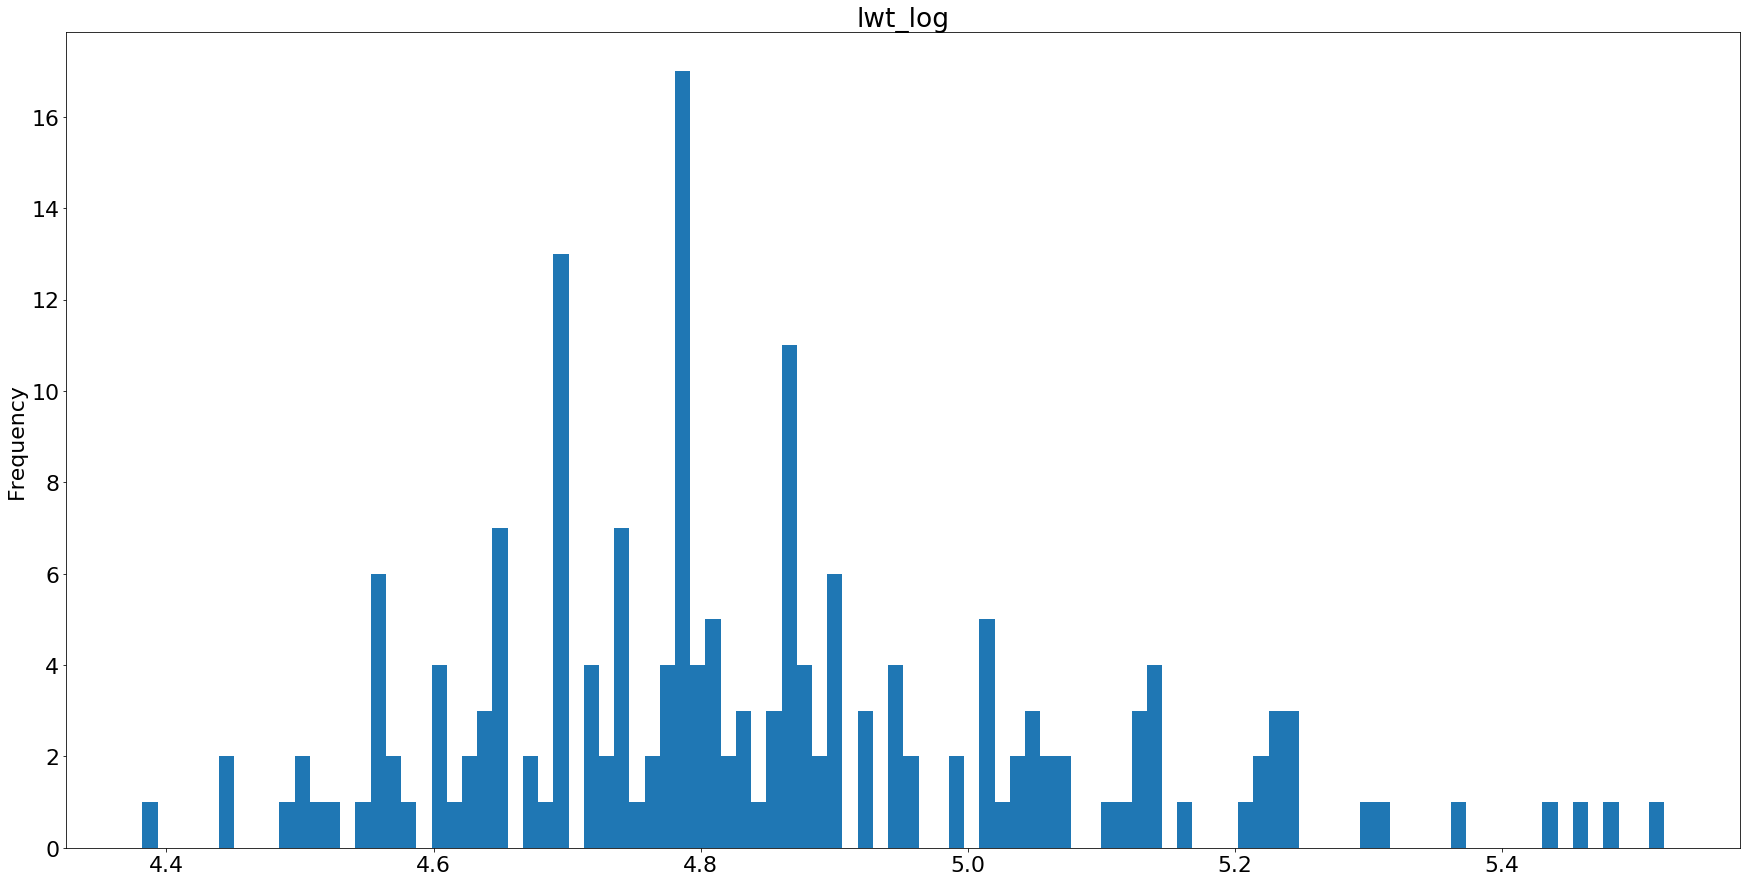

smoke
-1.0    113
 1.0     68
Name: smoke, dtype: int64


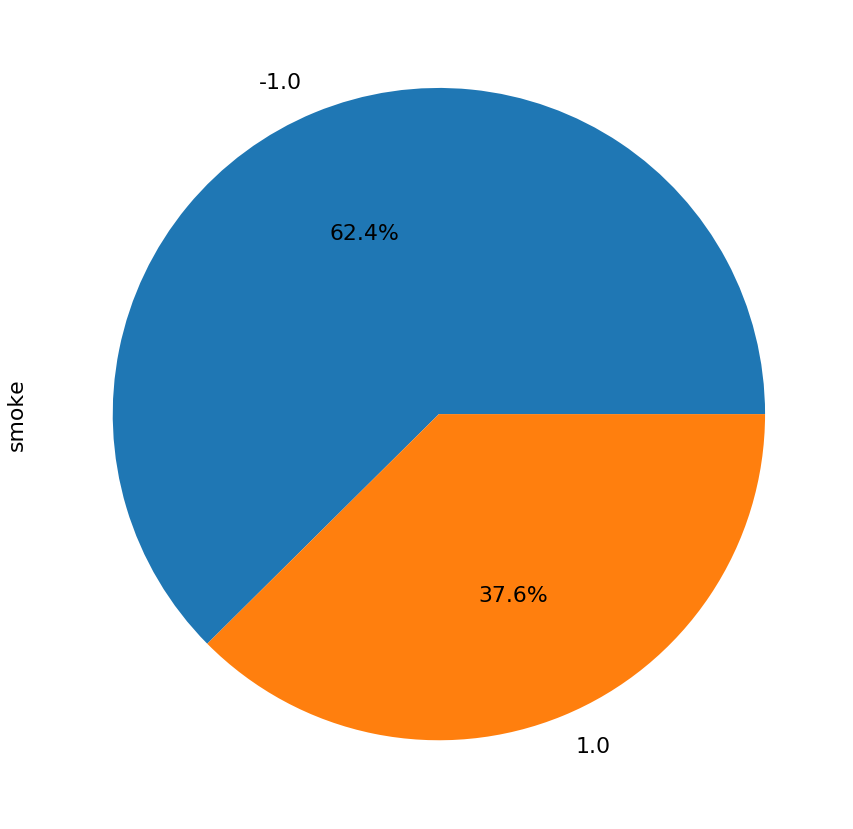

ht
-1.0    169
 1.0     12
Name: ht, dtype: int64


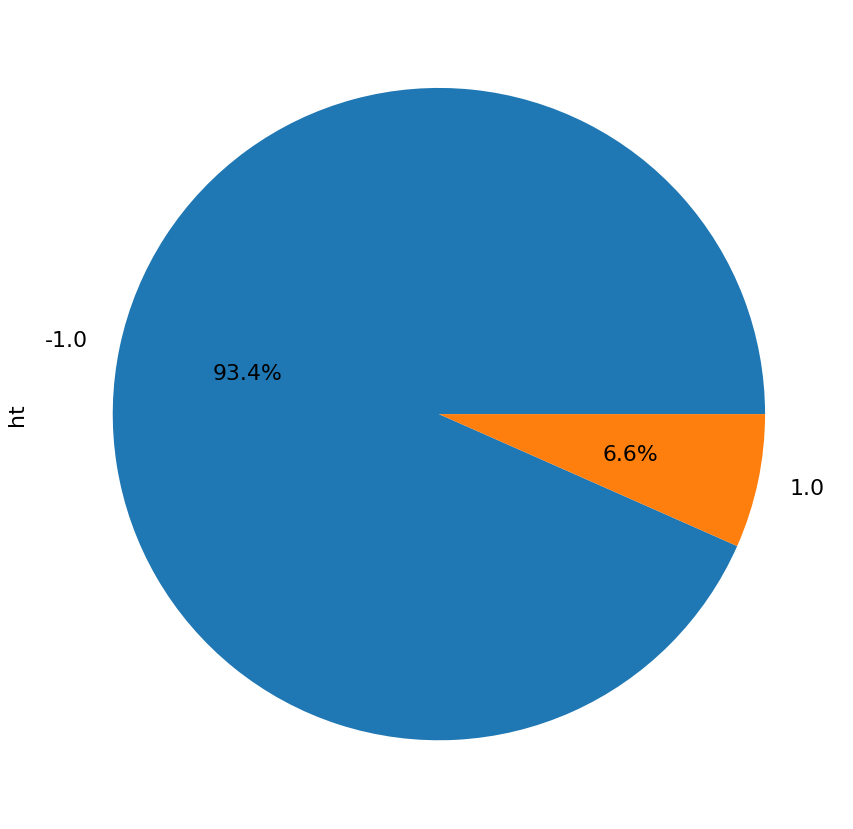

ptl
-1.0    151
 1.0     30
Name: ptl, dtype: int64


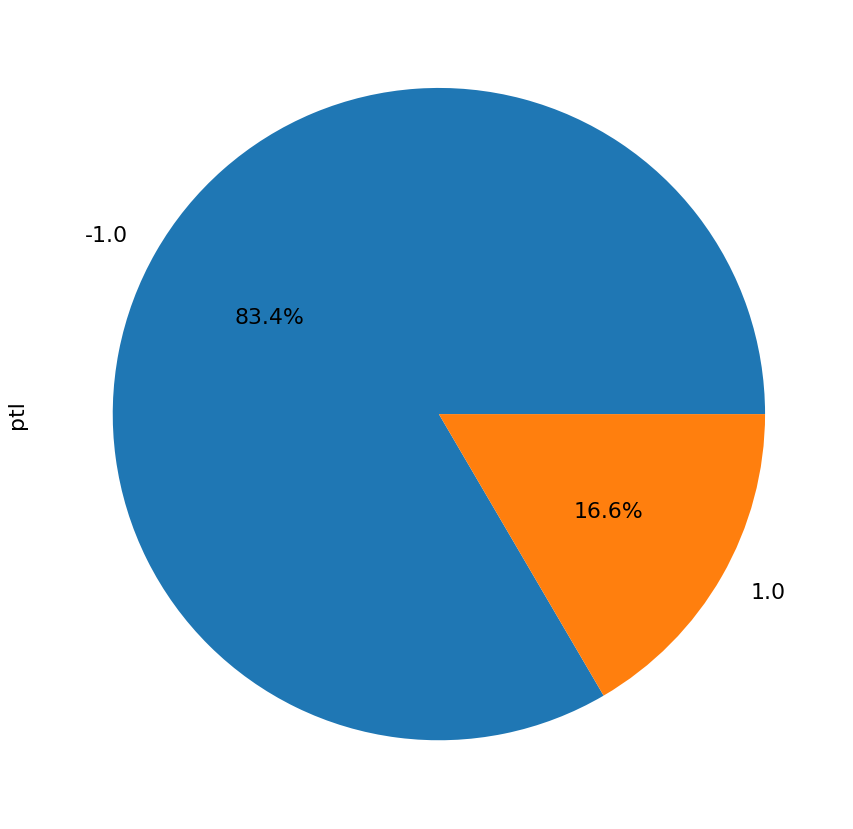

ui
-1.0    154
 1.0     27
Name: ui, dtype: int64


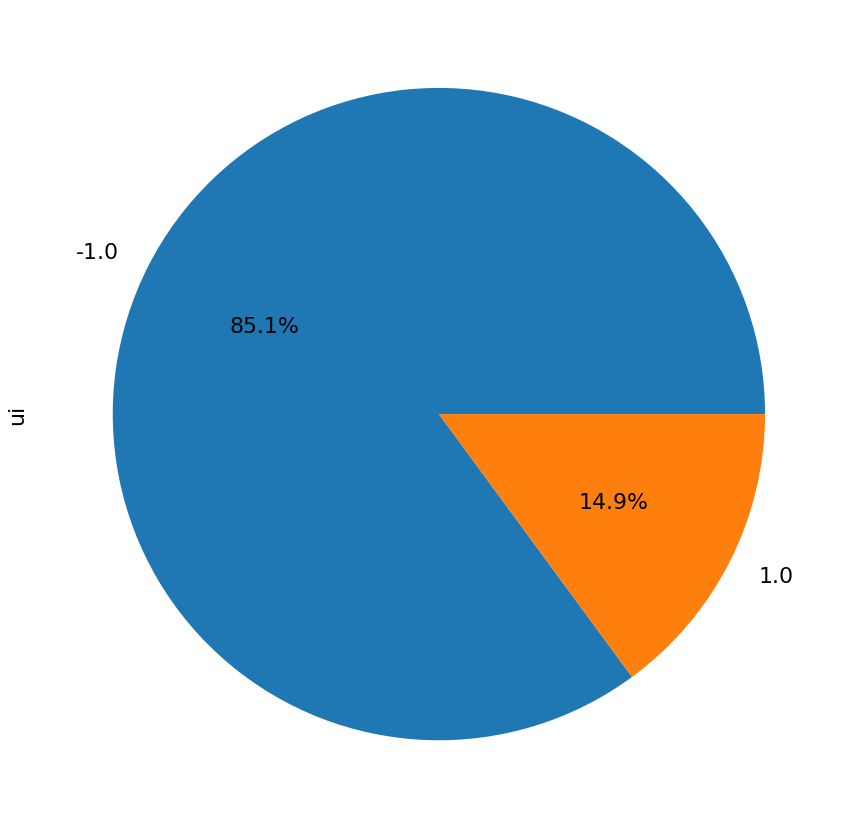

race
1.0    90
3.0    66
2.0    25
Name: race, dtype: int64


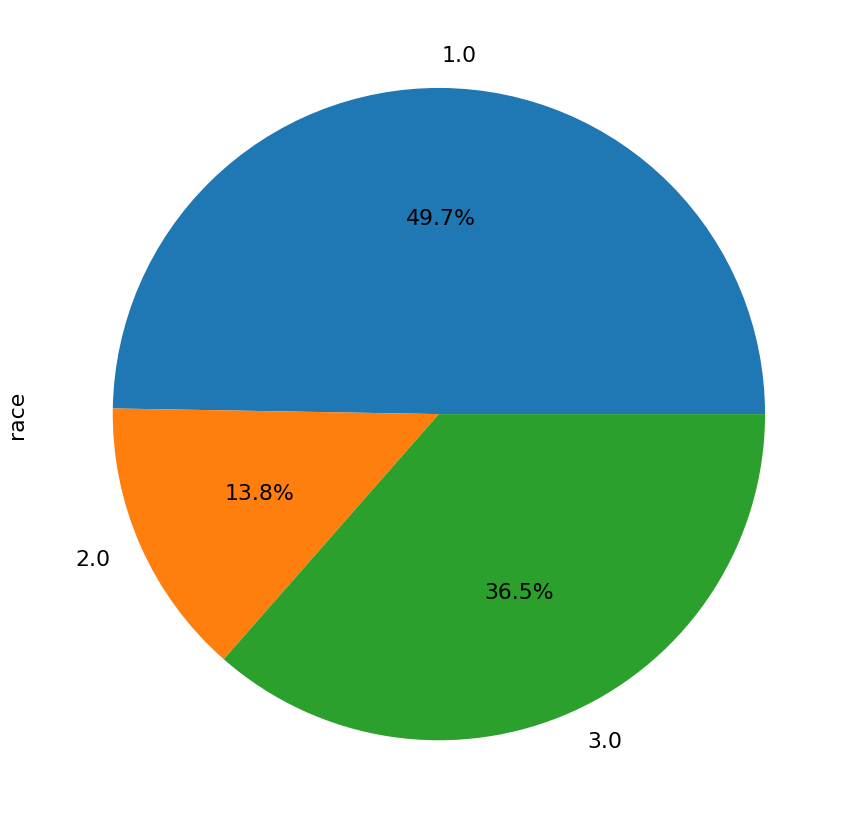

bwt
1.0    123
0.0     58
Name: bwt, dtype: int64


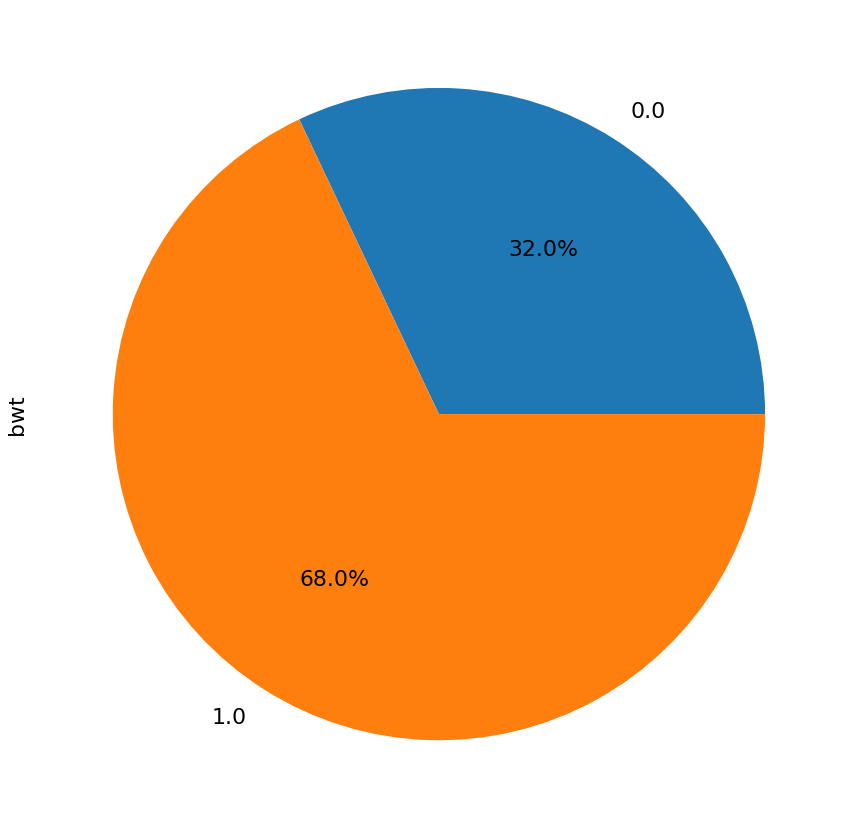

In [22]:
def des(col):
    print(col)
    print(row_df[col].value_counts())
    if col == "smoke" or col == "ht" or col == "ptl" or col == "race" or col == "bwt" or col == "ui":
        raise Exception()
    print("mean: " + str(row_df[col].mean()))
    print("std: " + str(row_df[col].std()))
    row_df[col].plot.hist(bins = 100, title = col)
    plt.show()
for field in row_df.columns.values:
    try:
        des(field)
    except:
        try:
            row_df[field].groupby(row_df[field]).count().plot(kind = 'pie', subplots=True, autopct='%1.1f%%')
            plt.show()
        except:
            continue

In [134]:
row_df = row_df.reset_index()

In [137]:
row_df = row_df.drop(columns=['index'])

In [138]:
random_seed = 4388
trainRatio = 0.7

len_rows = len(row_df)
np.random.seed(random_seed)
index = np.arange(len_rows)
np.random.shuffle(index)
trainCount = (int)(len_rows*trainRatio)

train_index = sorted(index[:trainCount])
test_index = sorted(index[trainCount:])

train_list = []
for i in train_index:
    train_list.append(row_df.loc[i])

test_list = []
for i in test_index:
    test_list.append(row_df.loc[i])

train_df = pd.DataFrame(train_list)
train_df.columns = ['age_log','lwt_log','smoke','ht','ptl','ui','race','bwt']
train_df.to_csv("0624trainFile_seed_%d.csv"%random_seed, index = False)

test_df = pd.DataFrame(test_list)
test_df.columns = ['age_log','lwt_log','smoke','ht','ptl','ui','race','bwt']
test_df.to_csv("0624testFile_seed_%d.csv"%random_seed, index = False)

In [139]:
train_df

,age_log,lwt_log,smoke,ht,ptl,ui,race,bwt
0,2.944439,5.204007,-1.0,-1.0,-1.0,1.0,2.0,1.0
1,3.496508,5.043425,-1.0,-1.0,-1.0,-1.0,3.0,1.0
3,3.044522,4.682131,1.0,-1.0,-1.0,1.0,1.0,1.0
6,3.091042,4.770685,-1.0,-1.0,-1.0,-1.0,1.0,1.0
8,3.367296,4.812184,1.0,-1.0,-1.0,-1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
174,3.258097,5.247024,1.0,-1.0,-1.0,-1.0,1.0,0.0
175,2.639057,4.615121,1.0,-1.0,1.0,-1.0,3.0,0.0
176,3.332205,4.553877,1.0,-1.0,-1.0,-1.0,1.0,0.0
179,2.833213,4.955827,-1.0,1.0,-1.0,-1.0,2.0,0.0


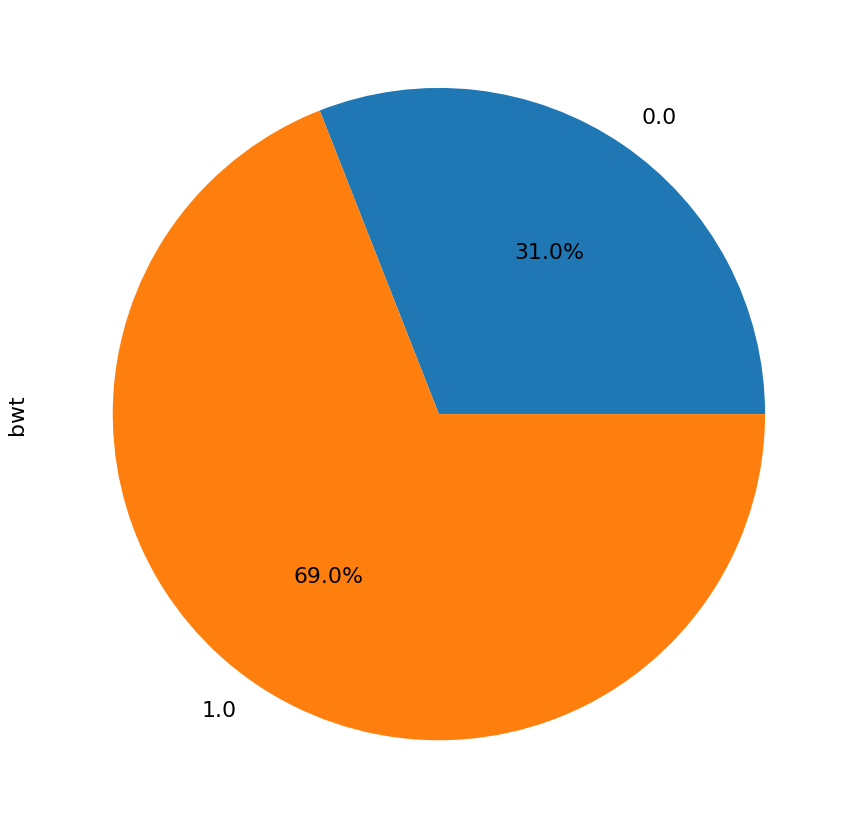

In [140]:
train_df['bwt'].groupby(train_df['bwt']).count().plot(kind = 'pie', subplots = True, autopct='%1.1f%%')
plt.show()

In [141]:
test_df

,age_log,lwt_log,smoke,ht,ptl,ui,race,bwt
2,2.995732,4.653960,1.0,-1.0,-1.0,-1.0,1.0,1.0
4,2.890372,4.672829,1.0,-1.0,-1.0,1.0,1.0,1.0
5,3.044522,4.820282,-1.0,-1.0,-1.0,-1.0,3.0,1.0
7,2.833213,4.634729,-1.0,-1.0,-1.0,-1.0,3.0,1.0
16,3.218876,4.770685,1.0,-1.0,-1.0,-1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
165,3.178054,4.653960,1.0,-1.0,-1.0,-1.0,2.0,0.0
169,2.833213,4.787492,1.0,-1.0,-1.0,-1.0,1.0,0.0
171,2.833213,4.787492,-1.0,-1.0,-1.0,-1.0,2.0,0.0
177,2.639057,4.605170,-1.0,-1.0,-1.0,-1.0,3.0,0.0


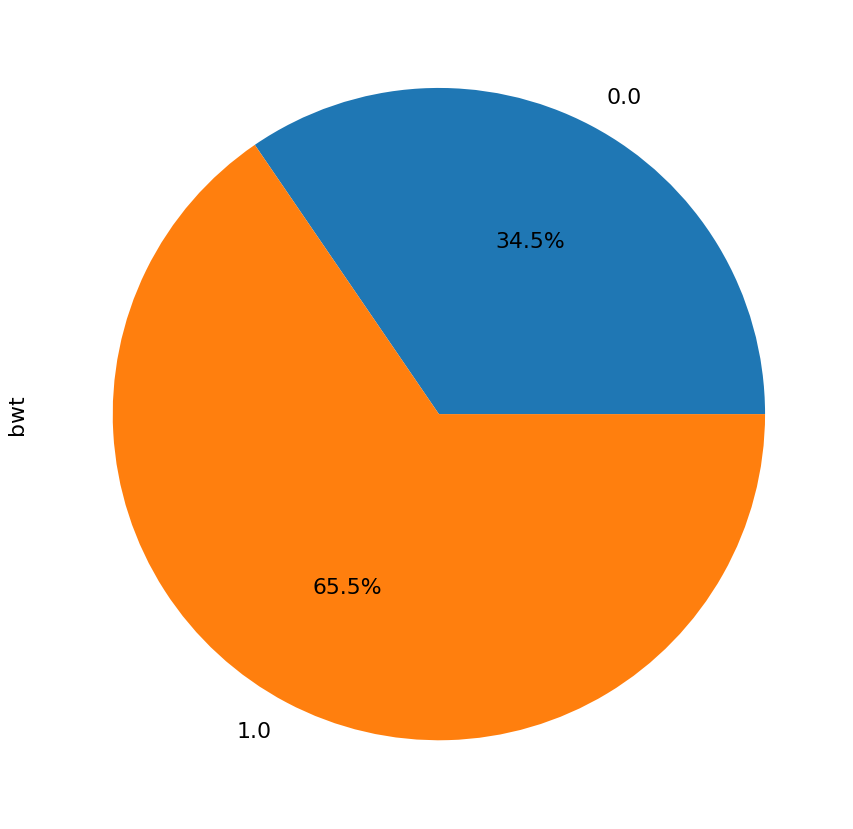

In [142]:
test_df['bwt'].groupby(test_df['bwt']).count().plot(kind = 'pie', subplots=True, autopct='%1.1f%%')
plt.show()